# Global imports and data preprocessing

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.font_manager import FontProperties
from scipy.stats import skew, kurtosis
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches


In [69]:
metrics=['iou', 'boundary_iou','assd', 'cldice', 'hd', 'dsc', 'nsd', 'masd', 'hd_perc' ]
stats=['mean', 'median', 'std', 'trimmed_mean', 'iqr_length']
all_values=[]
for metric in metrics:
    for stat in stats:

        file_path = f"../../../results_metrics_segm/aggregated_results_{metric}_{stat}.csv"
        data = pd.read_csv(file_path)
        n_subset=data['n'].unique()
        tasks=data['subtask'].unique()
 
        algos=data['alg_name'].unique()
        for task in tasks: 
            data_task=data[data['subtask']==task]
            for algo in algos: 
                data_algo=data_task[data_task['alg_name']==algo]
                
                for n in n_subset:  # Show only selected n values
                    data_n = data_algo[data_algo['n'] == n]
                    method_dict = {
                        'Basic': 'contains_true_stat_basic',
                        'bca': 'contains_true_stat_bca',
                        'percentile': 'contains_true_stat_percentile',
                    }

                    # Add parametric methods only for stat == 'mean'
                    if stat == 'mean':
                        method_dict.update({
                            'Parametric z': 'contains_true_stat_param_z',
                            'Parametric t': 'contains_true_stat_param_t'
                        })
                    for method, col in method_dict.items():
                        for val in data_n[col]:
                            
                            all_values.append({
                                'metric': metric,
                                'stat': stat,
                                'task':task, 
                                'algo':algo,
                                'n': n,
                                'method': method,
                                'coverage': val,
                                'x_group': f"{metric}\nn={n}"
                            })
df_segm=pd.DataFrame(all_values)

In [70]:
metrics=['iou', 'boundary_iou','assd', 'cldice', 'hd', 'dsc', 'nsd', 'masd', 'hd_perc' ]
stats=['mean', 'median', 'std', 'trimmed_mean', 'iqr_length']
all_values_width=[]
for metric in metrics:
    for stat in stats:

        file_path = f"../../../results_metrics_segm/aggregated_results_{metric}_{stat}.csv"
        data = pd.read_csv(file_path)
        n_subset=data['n'].unique()
        tasks=data['subtask'].unique()
 
        algos=data['alg_name'].unique()
        for task in tasks: 
            data_task=data[data['subtask']==task]
            for algo in algos: 
                data_algo=data_task[data_task['alg_name']==algo]
                
                for n in n_subset:  # Show only selected n values
                    data_n = data_algo[data_algo['n'] == n]
                    method_dict = {
                        'Basic': 'width_basic',
                        'bca': 'width_bca',
                        'percentile': 'width_percentile',
                    }

                    # Add parametric methods only for stat == 'mean'
                    if stat == 'mean':
                        method_dict.update({
                            'Parametric z': 'width_param_z',
                            'Parametric t': 'width_param_t'
                        })
                    for method, col in method_dict.items():
                        for val in data_n[col]:
                            
                            all_values_width.append({
                                'metric': metric,
                                'stat': stat,
                                'task':task, 
                                'algo':algo,
                                'n': n,
                                'method': method,
                                'width': val,
                                'x_group': f"{metric}\nn={n}"
                            })
df_segm_width=pd.DataFrame(all_values_width)

In [71]:
stats=['accuracy', 'ap', 'auc', 'f1_score']
all_values_micro=[]

for stat in stats:
    file_path = f"../../../results_metrics_classif/aggregated_results_{stat}.csv"
    data = pd.read_csv(file_path)
    
    n_subset=data['n'].unique()
    tasks=data['subtask'].unique()
    algos=data['alg_name'].unique()
    for task in tasks: 
        data_task=data[data['subtask']==task]
        for algo in algos: 
            data_algo=data_task[data_task['alg_name']==algo]
            for n in n_subset:  # Show only selected n values
                data_n = data_algo[data_algo['n'] == n]
      
                method_dict = {
                    'Basic': 'contains_true_stat_basic',
                    'bca': 'contains_true_stat_bca',
                    'percentile': 'contains_true_stat_percentile',
                }

                # Add parametric methods only for stat == 'mean'
                if stat == 'accuracy':
                    method_dict.update({
                        'agresti_coull':'contains_true_stat_agresti_coull',
                        'wilson':'contains_true_stat_wilson',
                        'exact':'contains_true_stat_exact',
                        'wald': 'contains_true_stat_wald'
                    })
                for method, col in method_dict.items():
                    for val in data_n[col]:
                        all_values_micro.append({
                            'subtask':task, 
                            'algo':algo,
                            'stat': stat,
                            'n': n,
                            'method': method,
                            'value': val,
                        
                            'x_group': f"n={n}"
                        })
df_micro=pd.DataFrame(all_values_micro)

In [72]:
stats=['accuracy', 'ap', 'auc', 'f1_score']
all_values_micro=[]

for stat in stats:
    file_path = f"../../../results_metrics_classif/aggregated_results_{stat}.csv"
    data = pd.read_csv(file_path)
    
    n_subset=data['n'].unique()
    tasks=data['subtask'].unique()
    algos=data['alg_name'].unique()
    for task in tasks: 
        data_task=data[data['subtask']==task]
        for algo in algos: 
            data_algo=data_task[data_task['alg_name']==algo]
            for n in n_subset:  # Show only selected n values
                data_n = data_algo[data_algo['n'] == n]
      
                method_dict = {
                    'Basic': 'width_basic',
                    'bca': 'width_bca',
                    'percentile': 'width_percentile',
                }

                # Add parametric methods only for stat == 'mean'
                if stat == 'accuracy':
                    method_dict.update({
                        'agresti_coull':'width_agresti_coull',
                        'wilson':'width_wilson',
                        'exact':'width_exact',
                        'wald': 'width_wald'
                    })
                for method, col in method_dict.items():
                    for val in data_n[col]:
                        all_values_micro.append({
                            'subtask':task, 
                            'algo':algo,
                            'stat': stat,
                            'n': n,
                            'method': method,
                            'width': val,
                        
                            'x_group': f"n={n}"
                        })
df_micro_width=pd.DataFrame(all_values_micro)

In [73]:
stats=['balanced_accuracy', 'ap', 'auc', 'f1_score']
all_values_macro=[]

for stat in stats:
    file_path = f"../../../results_metrics_classif_macro/aggregated_results_{stat}.csv"
    data = pd.read_csv(file_path)
    
    n_subset=data['n'].unique()
    tasks=data['subtask'].unique()
    algos=data['alg_name'].unique()
    for task in tasks: 
        data_task=data[data['subtask']==task]
        for algo in algos: 
            data_algo=data_task[data_task['alg_name']==algo]
            for n in n_subset:  # Show only selected n values
                data_n = data_algo[data_algo['n'] == n]
      
                method_dict = {
                    'Basic': 'contains_true_stat_basic',
                    'bca': 'contains_true_stat_bca',
                    'percentile': 'contains_true_stat_percentile',
                }

                # Add parametric methods only for stat == 'mean'
                if stat == 'accuracy':
                    method_dict.update({
                        'agresti_coull':'contains_true_stat_agresti_coull',
                        'wilson':'contains_true_stat_wilson',
                        'exact':'contains_true_stat_exact',
                        'wald': 'contains_true_stat_wald'
                    })
                for method, col in method_dict.items():
                    for val in data_n[col]:
                        all_values_macro.append({
                            'subtask':task, 
                            'algo':algo,
                            'stat': stat,
                            'n': n,
                            'method': method,
                            'value': val,
                        
                            'x_group': f"n={n}"
                        })
df_macro=pd.DataFrame(all_values_macro)

In [74]:
stats=['balanced_accuracy', 'ap', 'auc', 'f1_score']
all_values_macro=[]

for stat in stats:
    file_path = f"../../../results_metrics_classif_macro/aggregated_results_{stat}.csv"
    data = pd.read_csv(file_path)
    
    n_subset=data['n'].unique()
    tasks=data['subtask'].unique()
    algos=data['alg_name'].unique()
    for task in tasks: 
        data_task=data[data['subtask']==task]
        for algo in algos: 
            data_algo=data_task[data_task['alg_name']==algo]
            for n in n_subset:  # Show only selected n values
                data_n = data_algo[data_algo['n'] == n]
      
                method_dict = {
                    'Basic': 'width_basic',
                    'bca': 'width_bca',
                    'percentile': 'width_percentile',
                }

                # Add parametric methods only for stat == 'mean'
                if stat == 'accuracy':
                    method_dict.update({
                        'agresti_coull':'width_agresti_coull',
                        'wilson':'width_wilson',
                        'exact':'width_exact',
                        'wald': 'width_wald'
                    })
                for method, col in method_dict.items():
                    for val in data_n[col]:
                        all_values_macro.append({
                            'subtask':task, 
                            'algo':algo,
                            'stat': stat,
                            'n': n,
                            'method': method,
                            'width': val,
                        
                            'x_group': f"n={n}"
                        })
df_macro_width=pd.DataFrame(all_values_macro)

# Figure 3

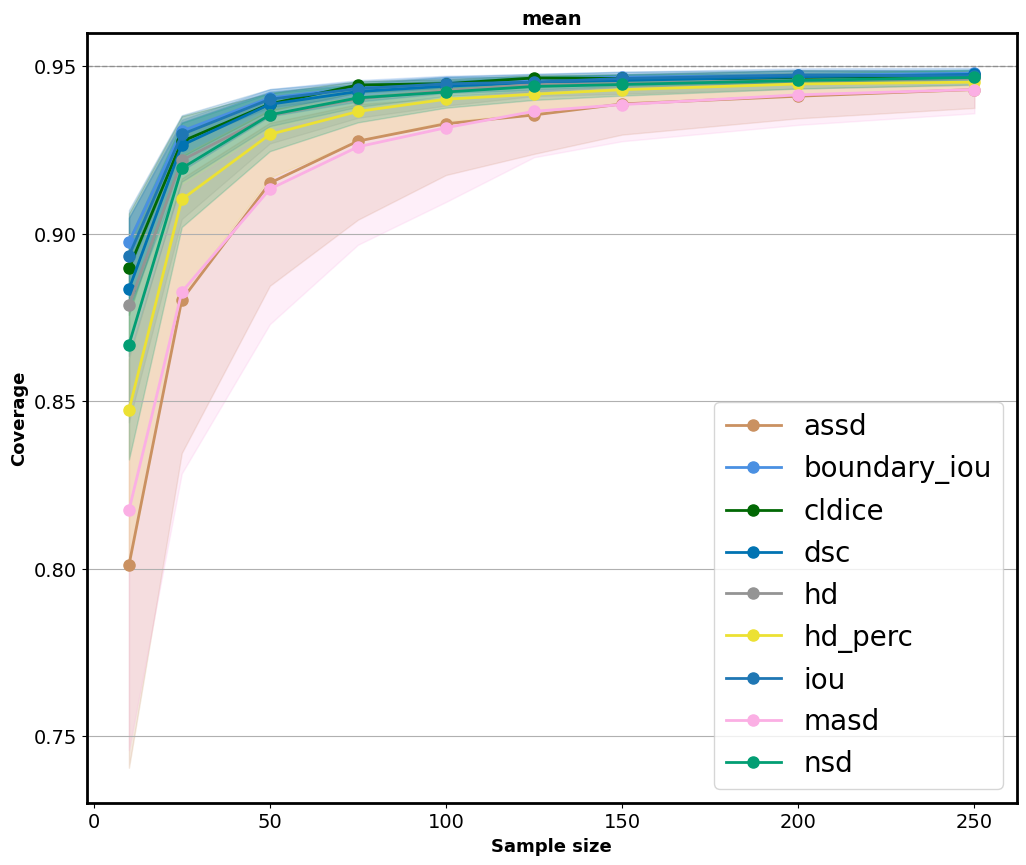

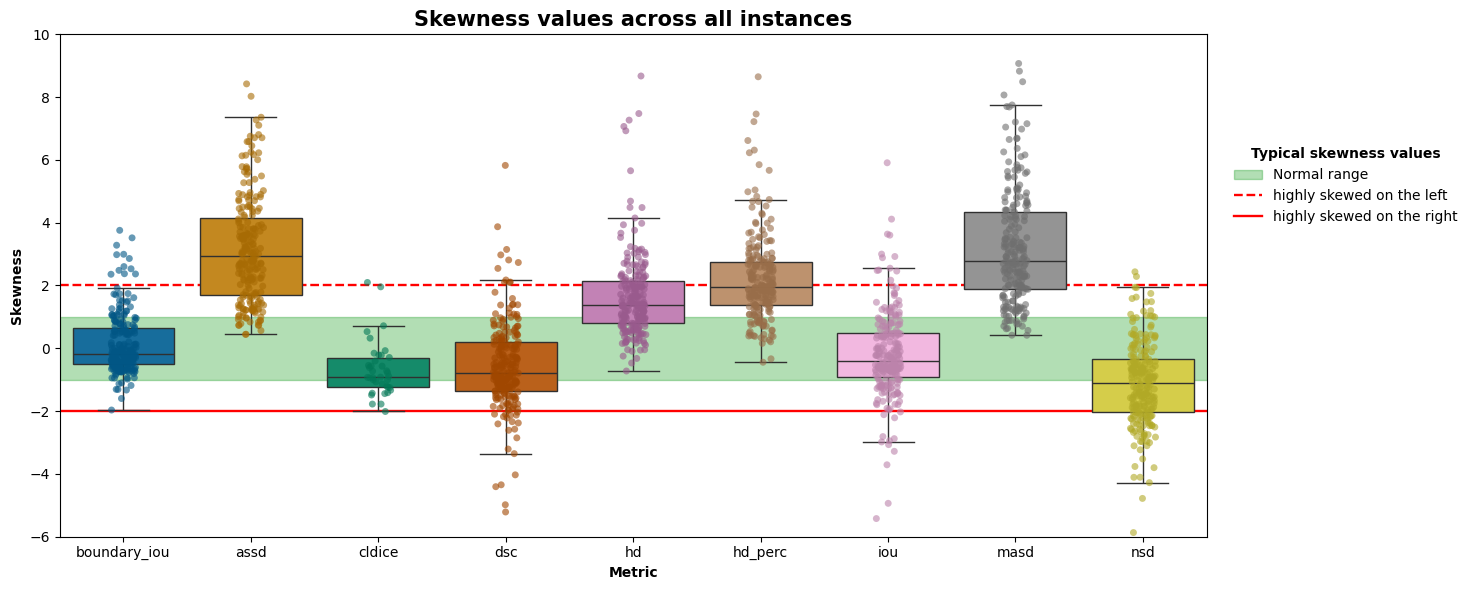

In [75]:
metric_order =['dsc', 'iou', 'nsd', 'boundary_iou', 'cldice', 'assd', 'masd', 'hd', 'hd_perc' ]

palette = sns.color_palette("colorblind", len(metric_order))
color_dict = dict(zip(metric_order, palette))
color_dict.update({"iou": "#1f77b4",          # standard seaborn/matplotlib blue
    "boundary_iou": "#4a90e2", 
    "cldice":  "#016804"})
stats=["mean"]


for stat in stats:
    data_stat=df_segm[df_segm['stat']==stat]
    data_method=data_stat[data_stat['method']=='percentile']

    fig, ax = plt.subplots(1, 1, figsize=(12, 10))
    for metric, df_metric in data_method.groupby('metric'):
        medians = data_method[data_method['metric']==metric].groupby('n')['coverage'].median().values
        q1 = data_method[data_method['metric']==metric].groupby('n')['coverage'].quantile(0.25).values
        q3 = data_method[data_method['metric']==metric].groupby('n')['coverage'].quantile(0.75).values
        ax.plot(df_metric['n'].unique(), medians, marker='o', label=metric, color=color_dict[metric], linewidth=2, markersize=8)
        ax.fill_between(df_metric['n'].unique(), q1, q3, alpha=0.2, color=color_dict[metric])

    ax.set_title(f'{stat}', weight='bold', fontsize=14)
    ax.axhline(0.95, linestyle='--', color='gray', linewidth=1, alpha=0.7)
    ax.set_xlabel('Sample size', weight='bold', fontsize=13)
    ax.set_ylabel('Coverage', weight='bold',fontsize=13)
    ax.grid(True, axis='y')
    ax.legend(fontsize=20)
    ax.tick_params(axis='x', labelsize=14)
    ax.tick_params(axis='y', labelsize=14)
    plt.savefig(f'../../../clean_figs/fig_3a.pdf')
    plt.show()

data= pd.read_csv("../../../data_matrix_grandchallenge_all.csv")

results=[]
metrics=data['score'].unique()
for score in metrics:
    df=data[data['score']==score]
    algos=df['alg_name'].unique()
    score=df['score'].unique()[0]
    count_total=0
    for alg in algos:

        df_alg= df[df['alg_name']==alg]
        tasks = df_alg['subtask'].unique()
        for task in tasks:
            if score=='cldice' and task not in  ['Task08_HepaticVessel_L1','Task08_HepaticVessel_L2']:
                continue 
            else:
                values = df_alg[df_alg['subtask'] == task]['value'].dropna()
                if len(values)<50:
                    continue
                count_total+=1
                value={
                'Metric':score,
                'algorithm': alg,
                'subtask': task,
                'skewness': skew(values),
                'kurtosis': kurtosis(values, fisher=False),
                'Mean': np.mean(values), 
                'Standard error': np.std(values, ddof=1),
                "total_number": count_total
                }  
    
                results.append(value)
results_df= pd.DataFrame(results)
for score in metrics: 
    mask = results_df['Metric'] == score
    max_val = results_df.loc[mask, 'total_number'].max()
    results_df.loc[mask, 'total_number'] = max_val


plt.rcdefaults()
sns.reset_defaults()

palette = sns.color_palette("colorblind", len(metrics))
color_dict = dict(zip(metrics, palette))
def darken_color(color, amount=0.8):
    return tuple(min(max(c * amount, 0), 1) for c in color)

dark_color_dict = {k: darken_color(v, 0.75) for k, v in color_dict.items()}

# Plot Skewness
plt.figure(figsize=(15, 6))
plt.axhspan(-1, 1, color='#009409', alpha=0.3, label='Normal range')
plt.axhline(2, color='red', linestyle='--', label='highly skewed on the left', linewidth=1.7)
plt.axhline(-2, color='red', linestyle='-',label='highly skewed on the right',linewidth=1.7)
ax=sns.boxplot(x='Metric', y='skewness', data=results_df,  hue='Metric',showfliers=False,palette=color_dict,linewidth=1)
sns.stripplot(x='Metric', y='skewness', data=results_df, hue='Metric', jitter=True, alpha=0.6,palette=dark_color_dict,legend=False)

plt.legend(title="Typical skewness values",
        loc='upper right',
        frameon=False,
        fontsize=10,
        title_fontproperties=FontProperties(weight='bold'),
        bbox_to_anchor=(1.23, 0.8)
    )
for i, metric in enumerate(metrics):
    data = results_df[results_df['Metric'] == metric]['skewness'].dropna()
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    upper_whisker = data[data <= q3 + 1.5 * iqr].max()
    total = results_df[results_df['Metric'] == metric]['total_number'].iloc[0]
    #plt.text(i, upper_whisker + 0.5, f'n={total}', ha='center', fontsize=10, fontweight='bold')

plt.title('Skewness values across all instances',weight='bold',fontsize=15)
plt.ylabel('Skewness',weight='bold')
plt.xlabel('Metric',weight='bold')
plt.tight_layout()
plt.ylim(-6,10)
plt.savefig('../../../clean_figs/fig_3b.pdf')
plt.show()

# Figure 4

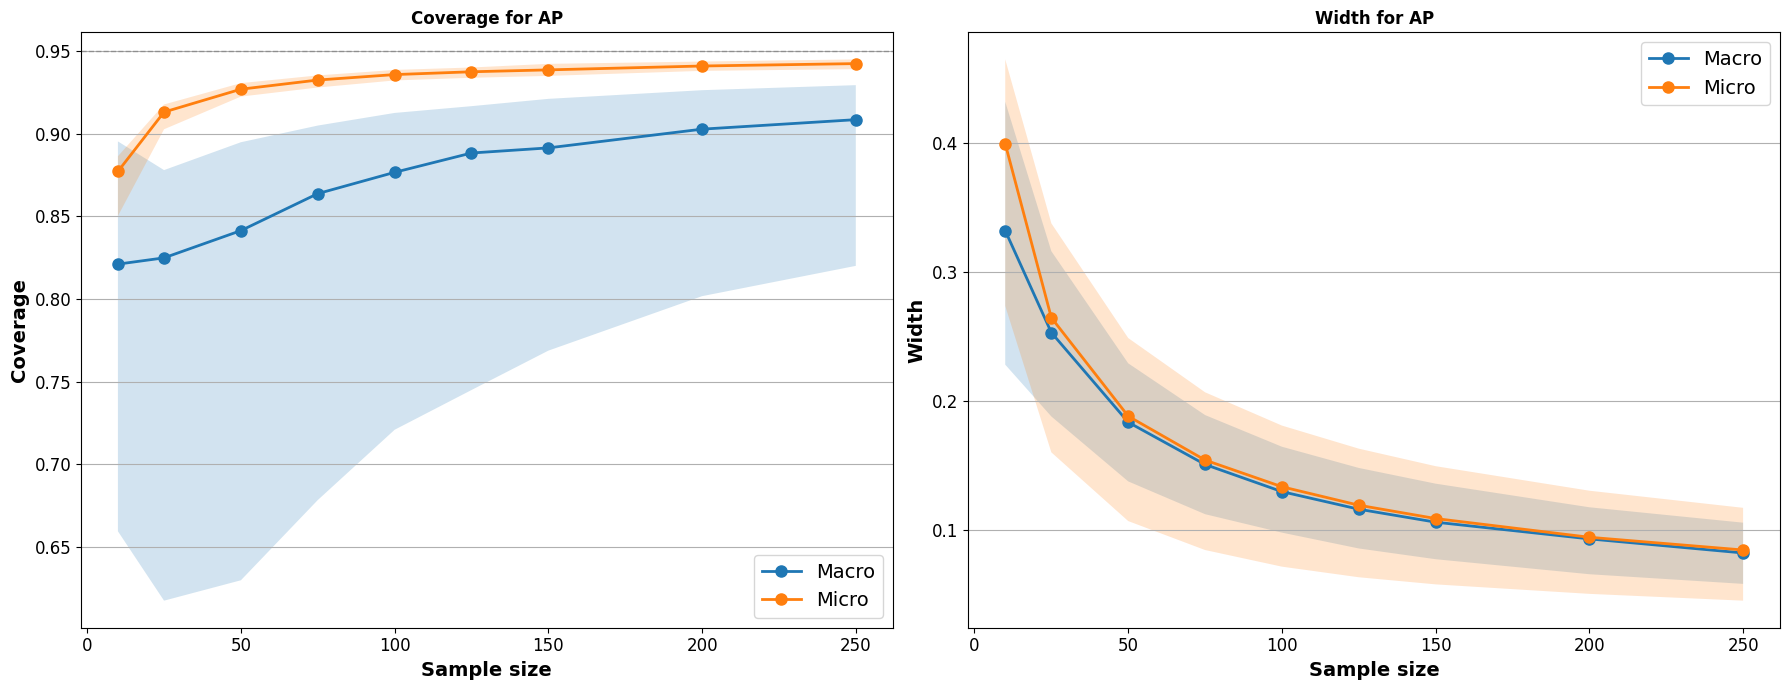

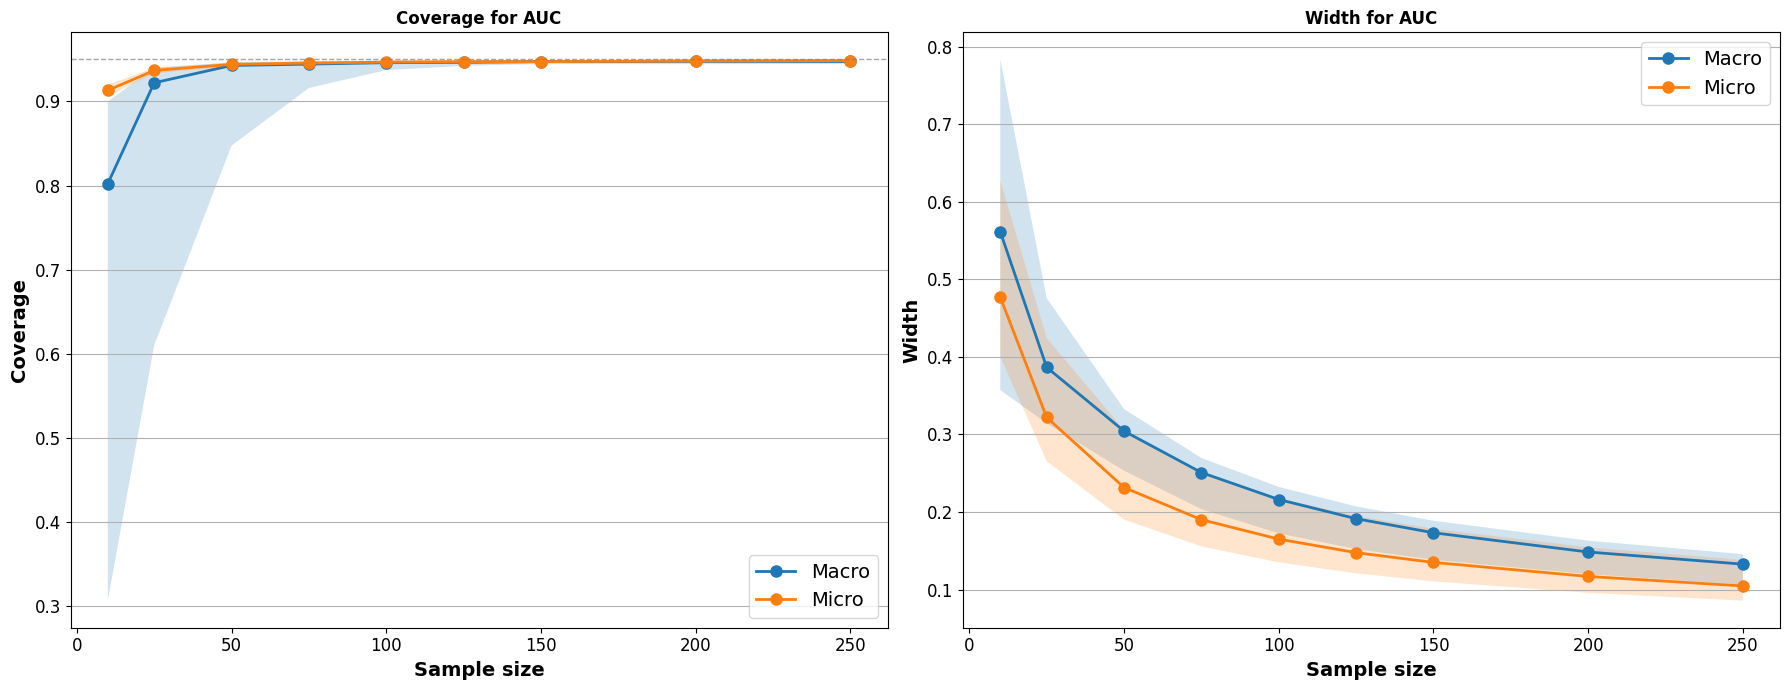

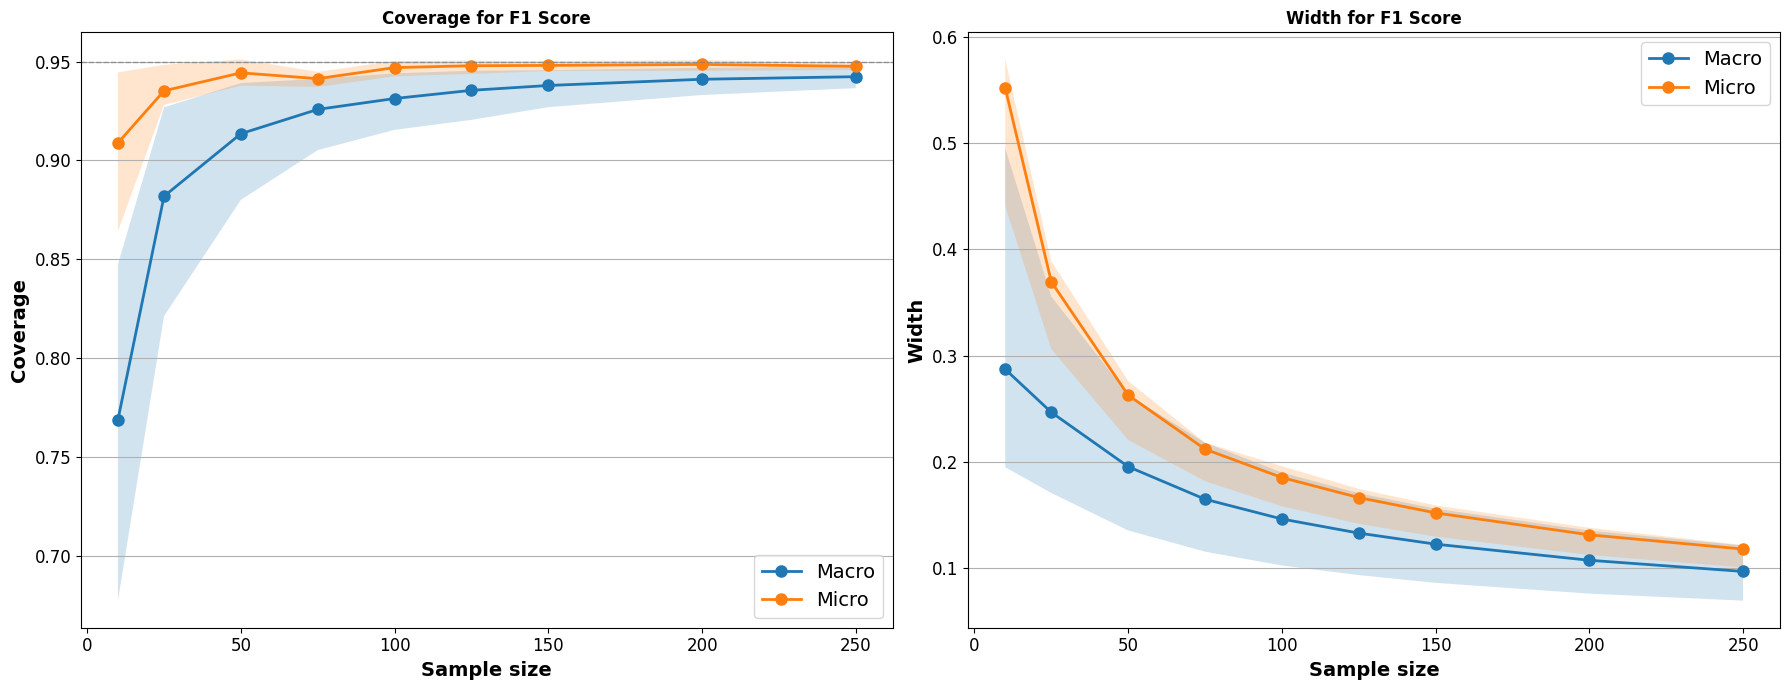

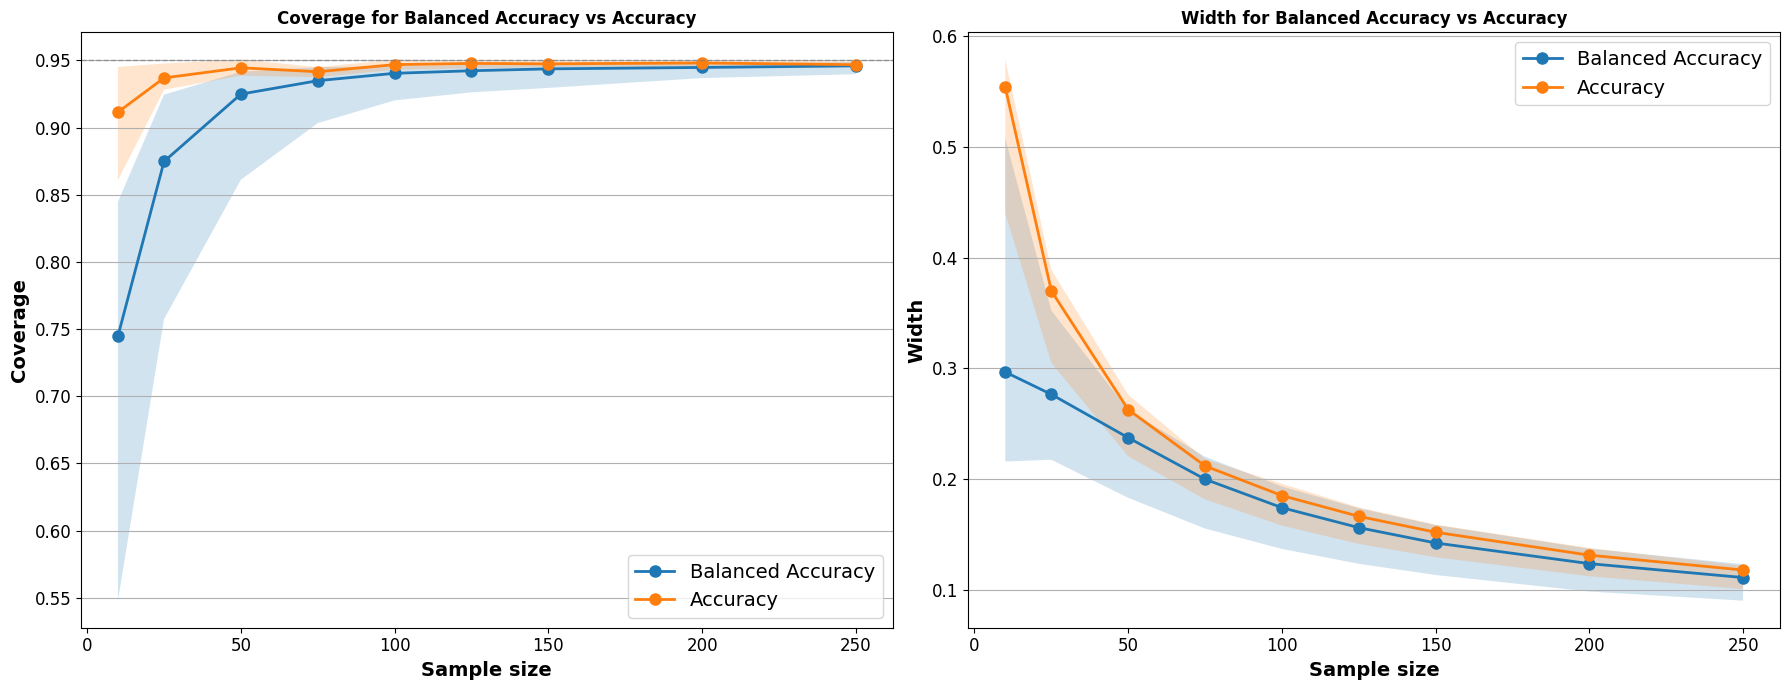

In [76]:
means_macro_df_n=df_macro[(df_macro['method']=='percentile') & (df_macro['n']<=250)].sort_values(by=['stat', 'n'])
means_micro_df_n=df_micro[(df_micro['method']=='percentile') & (df_micro['n']<=250)].sort_values(by=['stat', 'n'])

means_macro_df_n_width =df_macro_width[(df_macro_width['method']=='percentile') & (df_macro_width['n']<=250)].sort_values(by=['stat', 'n'])
means_micro_df_n_width =df_micro_width[(df_micro_width['method']=='percentile') & (df_micro_width['n']<=250)].sort_values(by=['stat', 'n'])

metrics_classif=np.append(means_macro_df_n['stat'].unique(), 'accuracy')
palette_classif = sns.color_palette("colorblind", len(metrics_classif))
color_dict_classif = dict(zip(metrics_classif, palette))

color_dict_classif.update({'balanced_accuracy':color_dict_classif['accuracy']})

metric_name_mapping = {
    'accuracy': 'Accuracy',
    'balanced_accuracy': 'Balanced Accuracy',
    'ap': 'AP',
    'auc': 'AUC',
    'f1_score': 'F1 Score'
}

# For each metric/stat, plot micro vs macro coverage in a separate figure

for metric in metrics_classif:
    if metric in ['accuracy', 'balanced_accuracy']:
        continue
    fig, (ax_cov, ax_width) = plt.subplots(1, 2, figsize=(18, 7), sharex=True)

    # Coverage subplot (left)
    # Macro
    macro_data = means_macro_df_n[means_macro_df_n['stat'] == metric]
    if not macro_data.empty:
        medians = macro_data.groupby('n')['value'].median().values
        q1 = macro_data.groupby('n')['value'].quantile(0.25).values
        q3 = macro_data.groupby('n')['value'].quantile(0.75).values
        n_vals = macro_data['n'].unique()
        ax_cov.plot(n_vals, medians, marker='o', label='Macro', linewidth=2, markersize=8)
        ax_cov.fill_between(n_vals, q1, q3, alpha=0.2)
    # Micro
    micro_data = means_micro_df_n[means_micro_df_n['stat'] == metric]
    if not micro_data.empty:
        medians = micro_data.groupby('n')['value'].median().values
        q1 = micro_data.groupby('n')['value'].quantile(0.25).values
        q3 = micro_data.groupby('n')['value'].quantile(0.75).values
        n_vals = micro_data['n'].unique()
        ax_cov.plot(n_vals, medians, marker='o', label='Micro', linewidth=2, markersize=8)
        ax_cov.fill_between(n_vals, q1, q3, alpha=0.2)
    ax_cov.axhline(0.95, linestyle='--', color='gray', linewidth=1, alpha=0.7)
    ax_cov.set_title(f'Coverage for {metric_name_mapping[metric]}', weight='bold')
    ax_cov.set_xlabel('Sample size', weight='bold', fontsize=14)
    ax_cov.set_ylabel('Coverage', weight='bold', fontsize=14)
    ax_cov.tick_params(axis='y', labelsize=12)
    ax_cov.tick_params(axis='x', labelsize=12)
    ax_cov.grid(True, axis='y')
    ax_cov.legend(fontsize=14)

    # Width subplot (right)
    # Macro
    macro_width = means_macro_df_n_width[means_macro_df_n_width['stat'] == metric]
    if not macro_width.empty:
        medians = macro_width.groupby('n')['width'].median().values
        q1 = macro_width.groupby('n')['width'].quantile(0.25).values
        q3 = macro_width.groupby('n')['width'].quantile(0.75).values
        n_vals = macro_width['n'].unique()
        ax_width.plot(n_vals, medians, marker='o', label='Macro', linewidth=2, markersize=8)
        ax_width.fill_between(n_vals, q1, q3, alpha=0.2)
    # Micro
    micro_width = means_micro_df_n_width[means_micro_df_n_width['stat'] == metric]
    if not micro_width.empty:
        medians = micro_width.groupby('n')['width'].median().values
        q1 = micro_width.groupby('n')['width'].quantile(0.25).values
        q3 = micro_width.groupby('n')['width'].quantile(0.75).values
        n_vals = micro_width['n'].unique()
        ax_width.plot(n_vals, medians, marker='o', label='Micro', linewidth=2, markersize=8)
        ax_width.fill_between(n_vals, q1, q3, alpha=0.2)
    ax_width.set_title(f'Width for {metric_name_mapping[metric]}', weight='bold')
    ax_width.set_xlabel('Sample size', weight='bold', fontsize=14)
    ax_width.set_ylabel('Width', weight='bold', fontsize=14)
    ax_width.tick_params(axis='y', labelsize=12)
    ax_width.tick_params(axis='x', labelsize=12)
    ax_width.grid(True, axis='y')
    ax_width.legend(fontsize=14)

    plt.tight_layout()
    plt.savefig(f'../../../clean_figs/fig_3b_{metric}.pdf')
    plt.show()

fig, (ax_cov, ax_width) = plt.subplots(1, 2, figsize=(18, 7), sharex=True)

# Coverage subplot (left)
# Macro
macro_data = means_macro_df_n[means_macro_df_n['stat'] == "balanced_accuracy"]
if not macro_data.empty:
    medians = macro_data.groupby('n')['value'].median().values
    q1 = macro_data.groupby('n')['value'].quantile(0.25).values
    q3 = macro_data.groupby('n')['value'].quantile(0.75).values
    n_vals = macro_data['n'].unique()
    ax_cov.plot(n_vals, medians, marker='o', label='Balanced Accuracy', linewidth=2, markersize=8)
    ax_cov.fill_between(n_vals, q1, q3, alpha=0.2)
# Micro
micro_data = means_micro_df_n[means_micro_df_n['stat'] == "accuracy"]
if not micro_data.empty:
    medians = micro_data.groupby('n')['value'].median().values
    q1 = micro_data.groupby('n')['value'].quantile(0.25).values
    q3 = micro_data.groupby('n')['value'].quantile(0.75).values
    n_vals = micro_data['n'].unique()
    ax_cov.plot(n_vals, medians, marker='o', label='Accuracy', linewidth=2, markersize=8)
    ax_cov.fill_between(n_vals, q1, q3, alpha=0.2)
ax_cov.axhline(0.95, linestyle='--', color='gray', linewidth=1, alpha=0.7)
ax_cov.set_title(f'Coverage for {metric_name_mapping["balanced_accuracy"]} vs Accuracy', weight='bold')
ax_cov.set_xlabel('Sample size', weight='bold', fontsize=14)
ax_cov.set_ylabel('Coverage', weight='bold', fontsize=14)
ax_cov.tick_params(axis='y', labelsize=12)
ax_cov.tick_params(axis='x', labelsize=12)
ax_cov.grid(True, axis='y')
ax_cov.legend(fontsize=14)

# Width subplot (right)
# Macro
macro_width = means_macro_df_n_width[means_macro_df_n_width['stat'] == "balanced_accuracy"]
if not macro_width.empty:
    medians = macro_width.groupby('n')['width'].median().values
    q1 = macro_width.groupby('n')['width'].quantile(0.25).values
    q3 = macro_width.groupby('n')['width'].quantile(0.75).values
    n_vals = macro_width['n'].unique()
    ax_width.plot(n_vals, medians, marker='o', label='Balanced Accuracy', linewidth=2, markersize=8)
    ax_width.fill_between(n_vals, q1, q3, alpha=0.2)
# Micro
micro_width = means_micro_df_n_width[means_micro_df_n_width['stat'] == "accuracy"]
if not micro_width.empty:
    medians = micro_width.groupby('n')['width'].median().values
    q1 = micro_width.groupby('n')['width'].quantile(0.25).values
    q3 = micro_width.groupby('n')['width'].quantile(0.75).values
    n_vals = micro_width['n'].unique()
    ax_width.plot(n_vals, medians, marker='o', label='Accuracy', linewidth=2, markersize=8)
    ax_width.fill_between(n_vals, q1, q3, alpha=0.2)
ax_width.set_title(f'Width for {metric_name_mapping["balanced_accuracy"]} vs Accuracy', weight='bold')
ax_width.set_xlabel('Sample size', weight='bold', fontsize=14)
ax_width.set_ylabel('Width', weight='bold', fontsize=14)
ax_width.tick_params(axis='y', labelsize=12)
ax_width.tick_params(axis='x', labelsize=12)
ax_width.grid(True, axis='y')
ax_width.legend(fontsize=14)

plt.tight_layout()
plt.savefig(f'../../../clean_figs/fig_3b_acc_ba.pdf')
plt.show()


# Figure 5

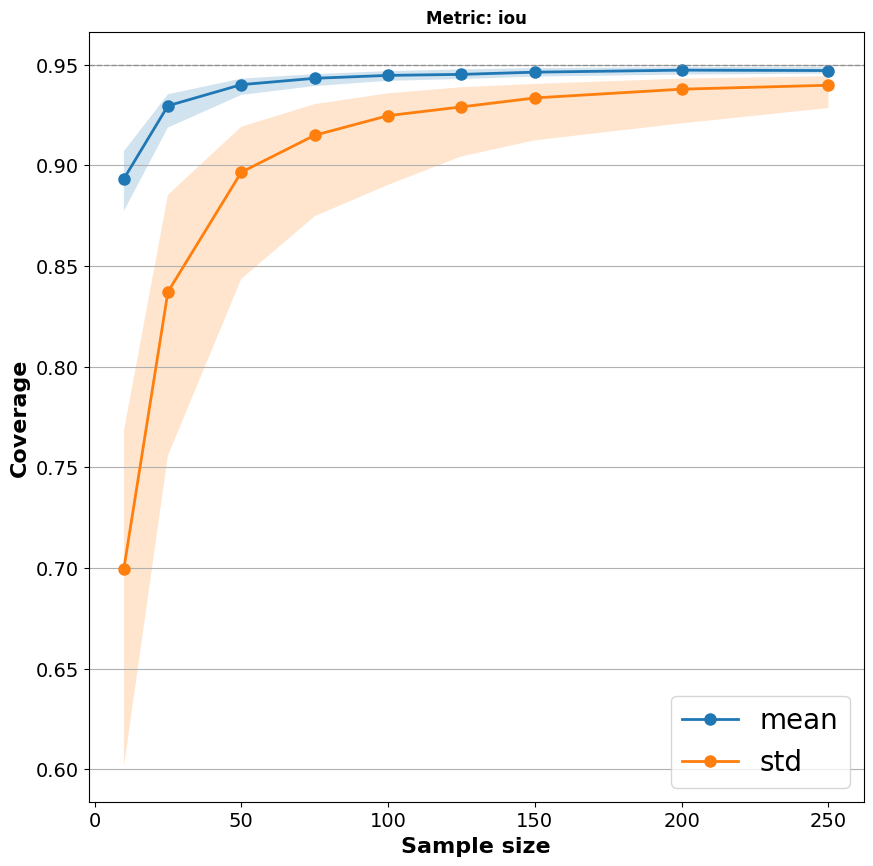

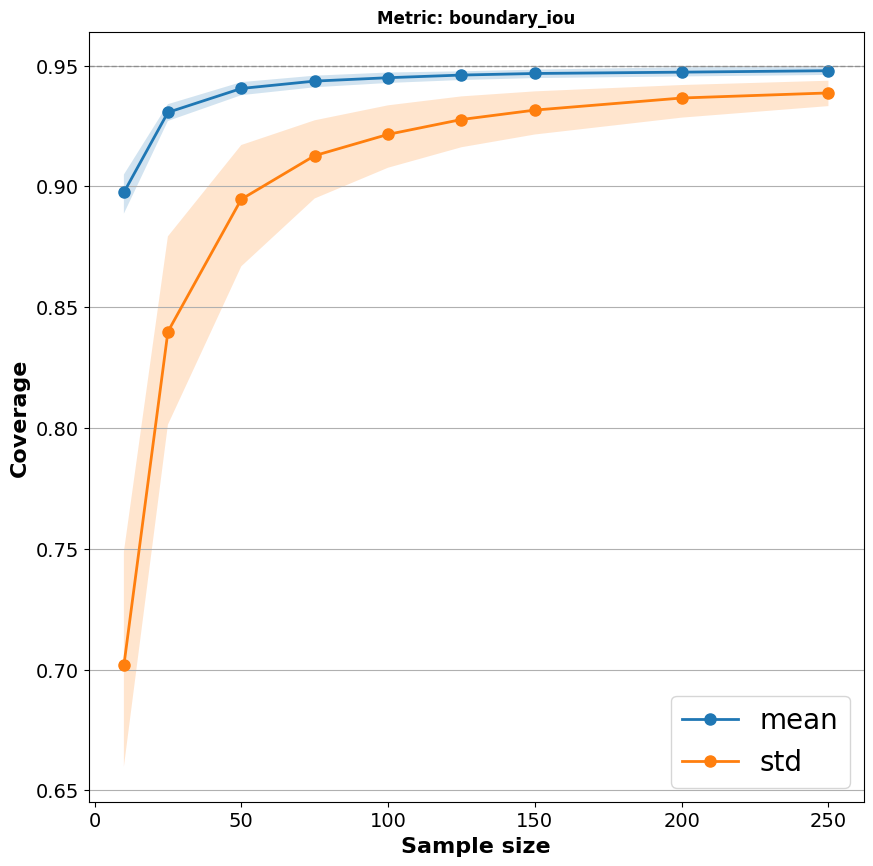

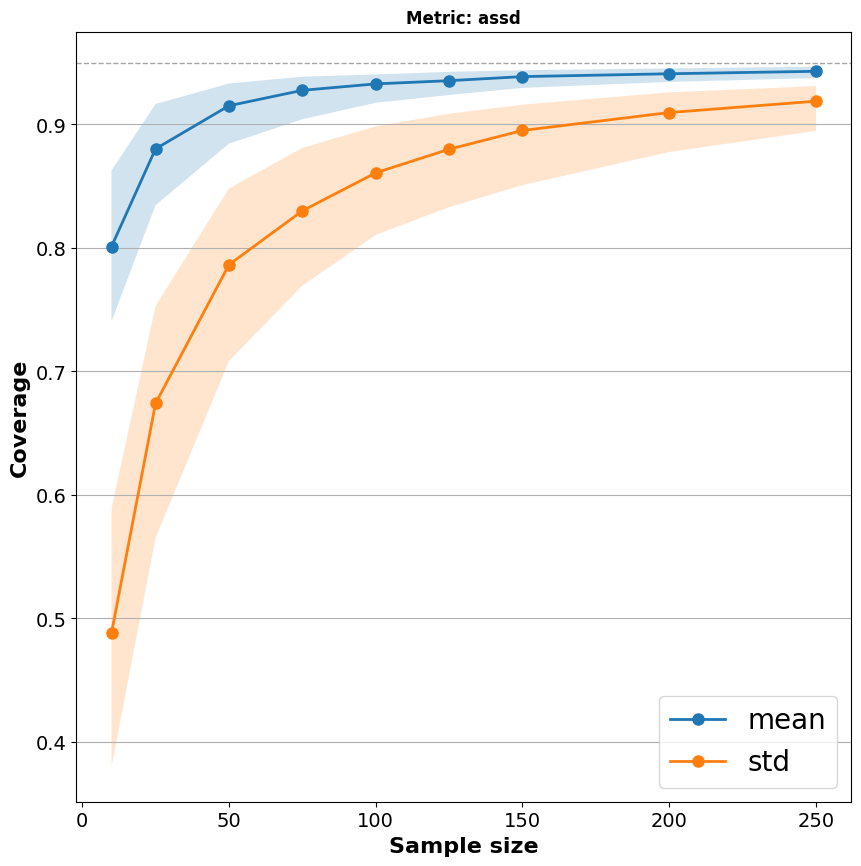

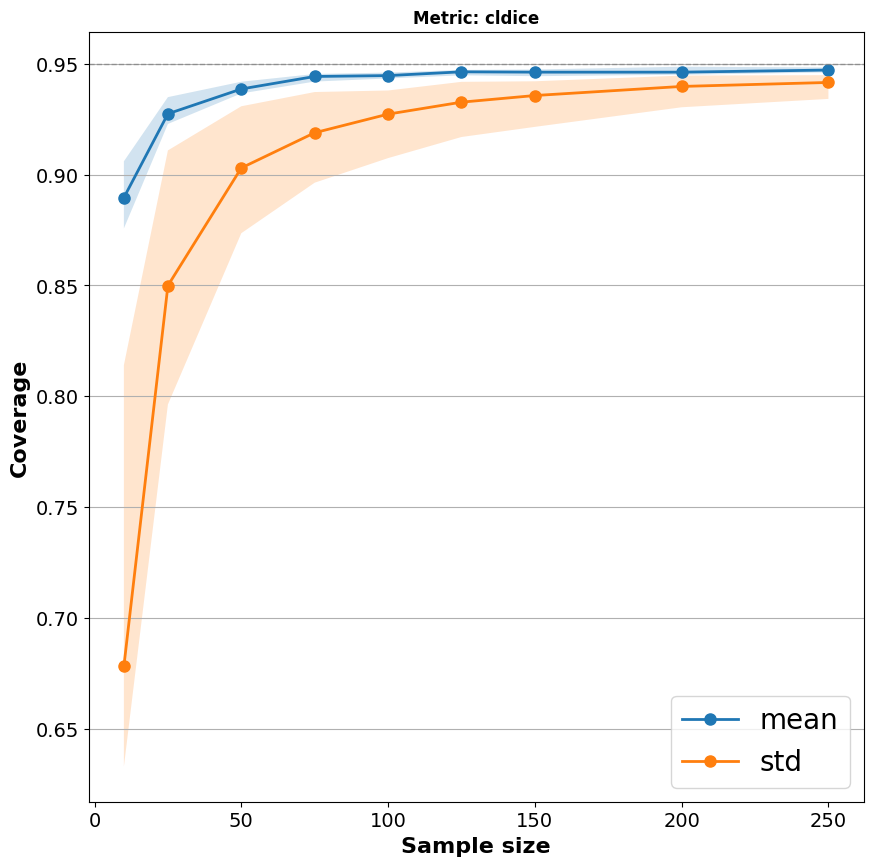

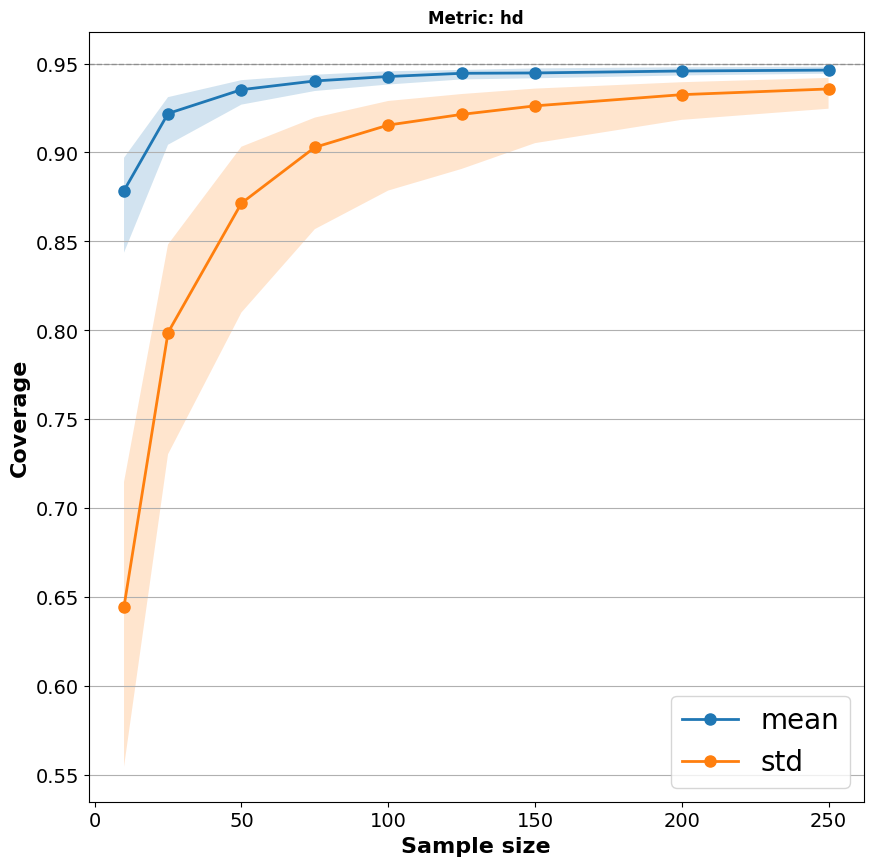

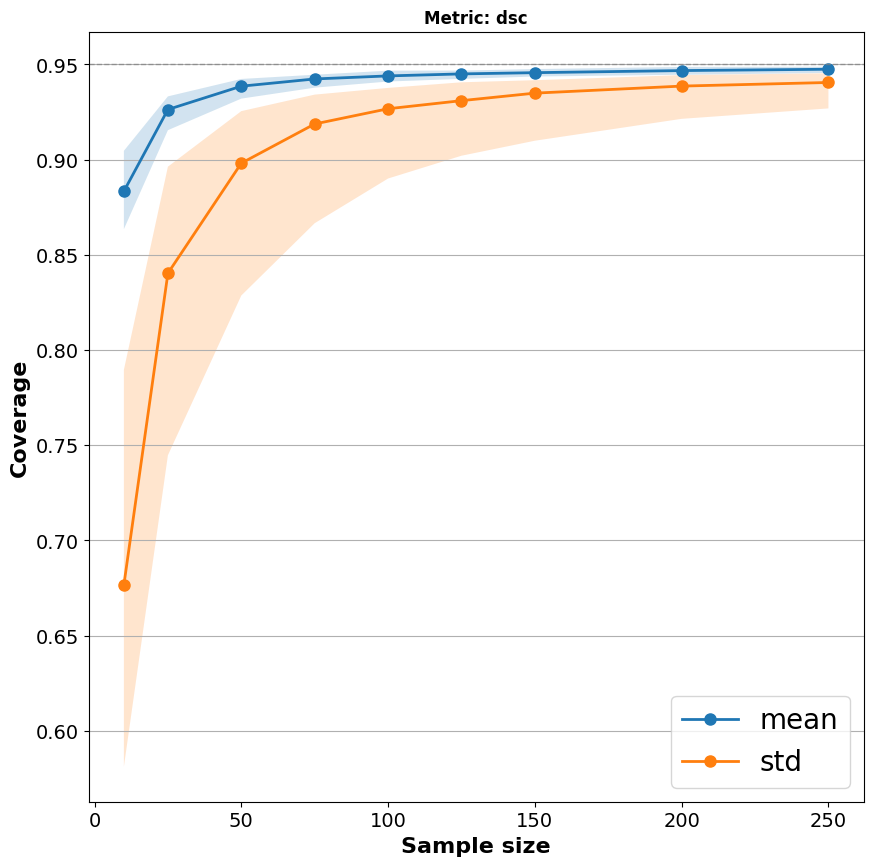

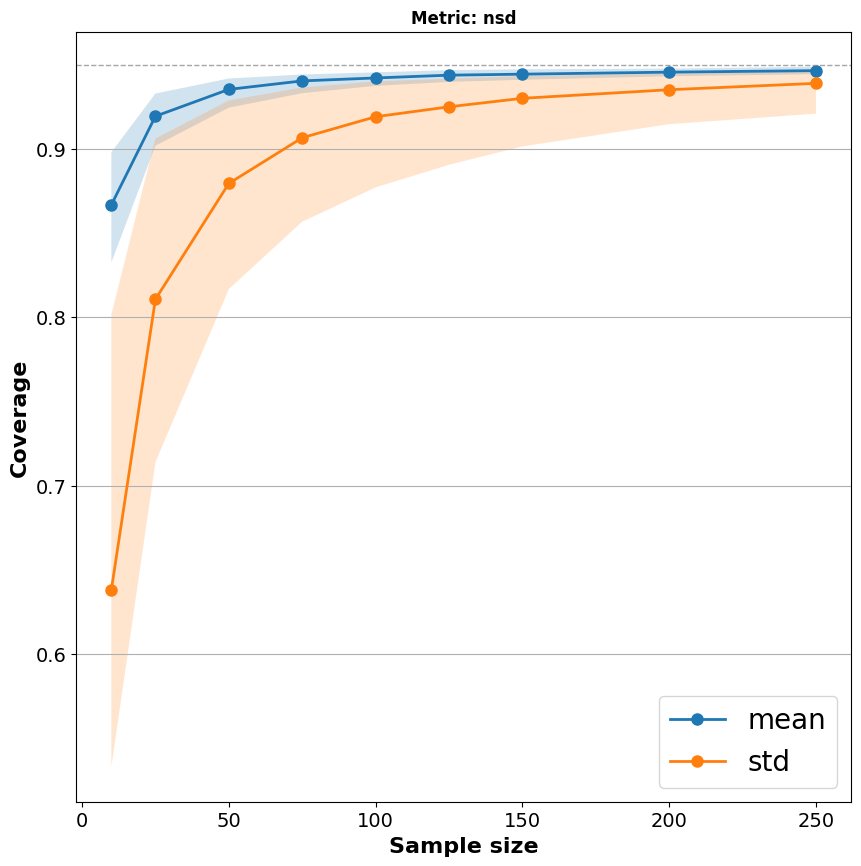

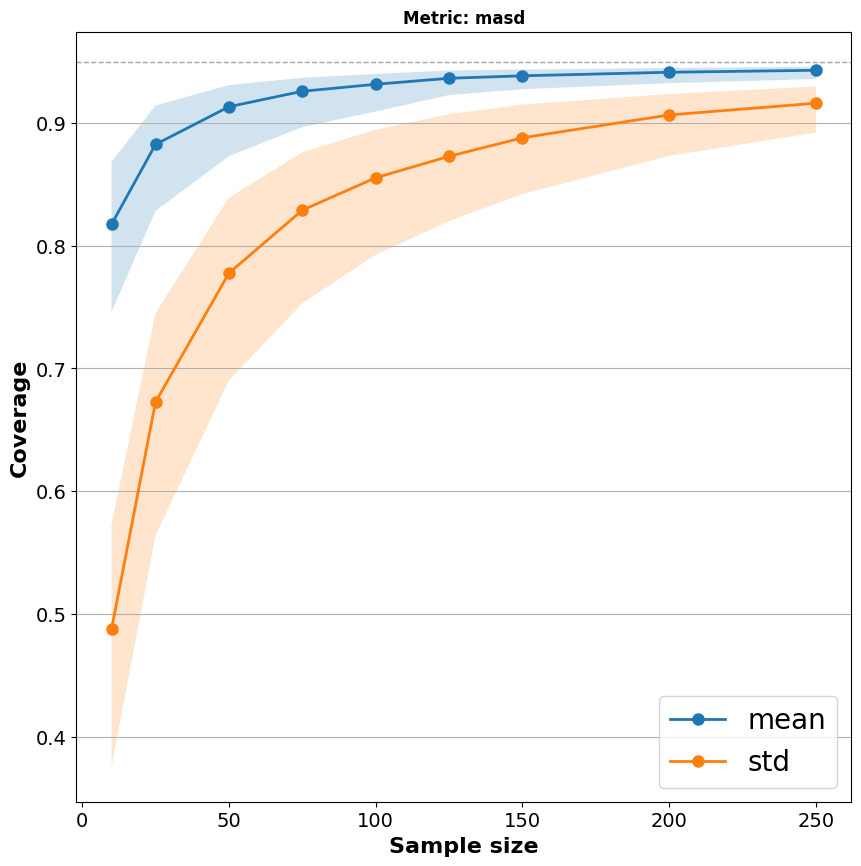

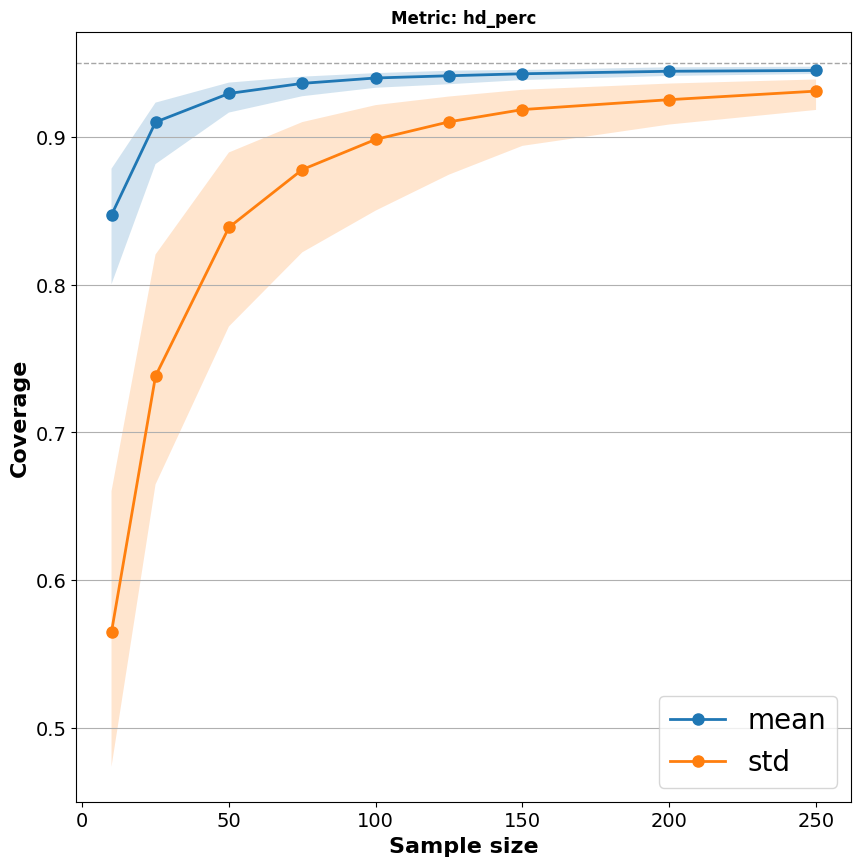

In [77]:
metrics = df_segm['metric'].unique()
CI_segm_stat=df_segm[df_segm['stat'].isin(['mean', 'std'])]


for metric in metrics:
    df_all_metric=CI_segm_stat[CI_segm_stat['metric']==metric]
    data_method=df_all_metric[df_all_metric['method']=='percentile']
    fig, ax = plt.subplots(1, 1, figsize=(10, 10), sharey=True)


# central plot
    for stat, df_stat in data_method.groupby('stat'):
        medians = df_stat.groupby('n')['coverage'].median().values
        q1 = df_stat.groupby('n')['coverage'].quantile(0.25).values
        q3 = df_stat.groupby('n')['coverage'].quantile(0.75).values
        ax.plot(df_stat['n'].unique(), medians, marker='o', label=stat, linewidth=2, markersize=8)
        ax.fill_between(df_stat['n'].unique(), q1, q3, alpha=0.2)

    ax.axhline(0.95, linestyle='--', color='gray', linewidth=1, alpha=0.7)
    ax.set_title(f'Metric: {metric}', weight='bold')
    ax.set_xlabel('Sample size',weight='bold', fontsize=16)
    ax.set_ylabel('Coverage', weight='bold', fontsize=16)
    ax.tick_params(axis='y', labelsize=14)
    ax.tick_params(axis='x', labelsize=14)

    ax.grid(True, axis='y')

    ax.legend(prop={'weight':'bold'}, fontsize= 20)
    plt.legend(fontsize= 20)

    plt.savefig(f"../../../clean_figs/fig_5_{metric}.pdf") # leave room for suptitle
    plt.show()


# Figure 6

In [78]:
df_mcc = pd.read_csv(f"../../../results_metrics_classif/aggregated_results_mcc.csv").drop(columns=['Unnamed: 0'])

stupid_classif_df = df_mcc[df_mcc["true_value"]==0][["subtask", "alg_name"]].drop_duplicates()

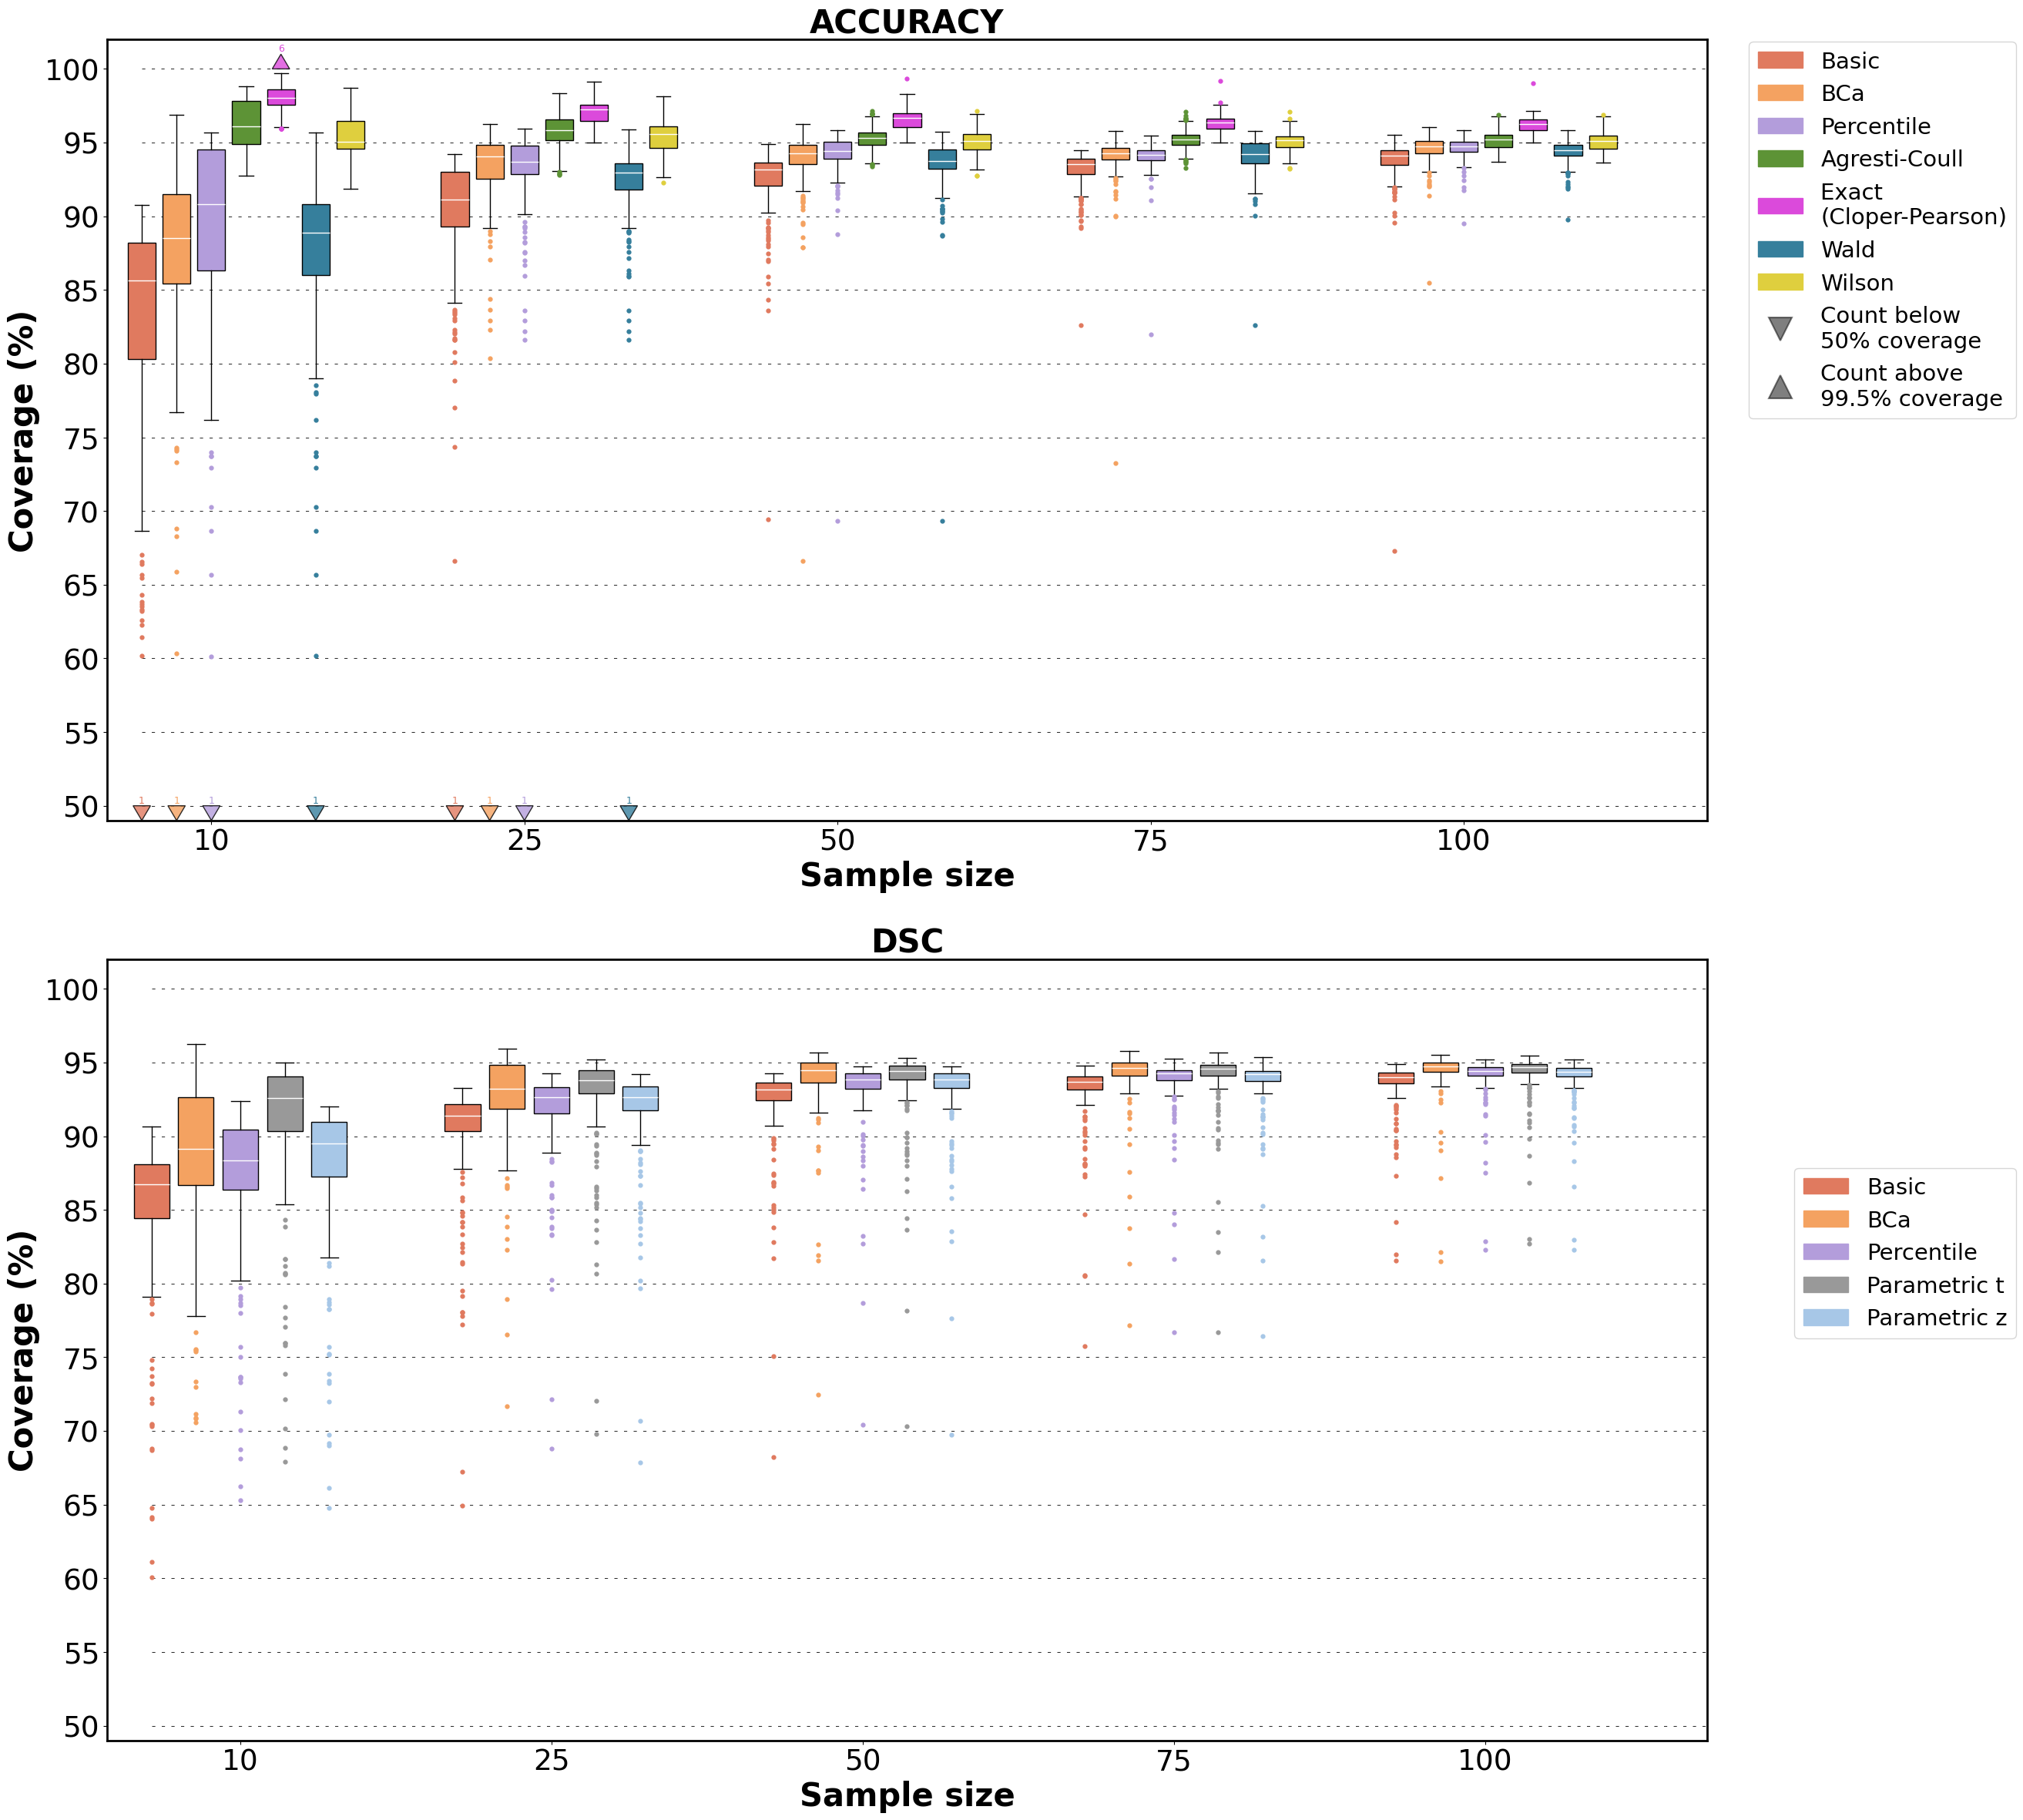

In [79]:
colors = {"basic": "#E07A5F", "percentile": "#B39DDB", "bca" : "#F4A261", "delong" : "#DA9CD1", "logit_transform" : "#A7C7E7",
          "wilson" : "#DFCF3E", "agresti_coull" : "#5D9336", "exact" : "#DB4ADB", "wald" : "#367F9C", "param_t" : "#999999", "param_z" : "#A7C7E7"}

labels = {
    "basic": "Basic",
    "percentile": "Percentile",
    "bca": "BCa",
    "delong": "DeLong",
    "logit_transform": "Logit Transform",
    "wilson": "Wilson",
    "agresti_coull" : "Agresti-Coull",
    "exact" : "Exact \n(Cloper-Pearson)",
    "wald" : 'Wald',
    "param_t" : "Parametric t",
    "param_z" : "Parametric z"
}
metrics = ["accuracy"]

size_factor = 3

# Set Nature-style: clean, minimal, sans-serif, no grid, no top/right spines
plt.rcParams.update({
    "font.family": "sans-serif",
    "font.size": 10*size_factor,
    "axes.titlesize": 10*size_factor,
    "axes.labelsize": 10*size_factor,
    "xtick.labelsize": 9*size_factor,
    "ytick.labelsize": 9*size_factor,
    "legend.fontsize": 7*size_factor,
    "axes.edgecolor": "black",
    "axes.linewidth": 2,
    "axes.spines.top": True,
    "axes.spines.right": True,
    "axes.grid": False,
    "xtick.direction": "out",
    "ytick.direction": "out",
    "figure.facecolor": "white",
    "axes.facecolor": "white"
})

fig, axs = plt.subplots(2, 1, figsize=(9*size_factor, 9*size_factor))

preferred_order = ["basic", "bca", "percentile"]
metric = "accuracy"
ax = axs[0]
df_all = pd.read_csv(f"../../../results_metrics_classif/aggregated_results_{metric}.csv").drop(columns=['Unnamed: 0'])

# Remove matching rows
df_filtered = df_all.merge(stupid_classif_df, on=['subtask', 'alg_name'], how='left', indicator=True)
df_all = df_filtered[df_filtered['_merge'] == 'left_only'].drop(columns=['_merge'])

methods = [c[6:] for c in df_all.columns if "width" in c]
preferred = [m for m in preferred_order if m in methods]
others = sorted([m for m in methods if m not in preferred_order])

methods = preferred+others

ax.hlines(np.arange(0, 1.01, 0.05), 0, (len(methods)+2)*len(df_all["n"].unique()-2), colors="black", linewidths=0.2*size_factor, linestyles=(0, (5,10)))

arrow_legend_down = False
arrow_legend_up = False
n_values = [n for n in np.sort(df_all["n"].unique()) if n<=100]
for i, n in enumerate(n_values):
    for j, method in enumerate(methods):
        coverages = df_all[df_all["n"]==n][f"contains_true_stat_{method}"]
        pos = (len(methods)+2)*i+j
        ax.boxplot(coverages, positions=[pos], widths=0.8, patch_artist=True,
                    boxprops=dict(facecolor=colors[method]),
                    flierprops=dict(marker='o', markersize=1*size_factor, markerfacecolor=colors[method],
                                        markeredgewidth=0.5*size_factor, markeredgecolor="black"),
                    medianprops=dict(color="white"), sym=colors[method])

        count_below = (coverages < 0.5).sum()
        if count_below > 0:
            arrow_legend_down = True
            triangle = mpatches.Polygon(
                [[pos, 0.49], [pos - 0.25, 0.5], [pos + 0.25, 0.5]],
                closed=True,
                facecolor=colors[method],
                edgecolor='black',
                alpha=0.8,
                zorder=10
            )
            ax.add_patch(triangle)
            ax.text(pos, 0.502, f'{count_below}',
                    ha='center', fontsize=3*size_factor, color=colors[method], 
                    bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.'))

        count_above = (coverages > 0.995).sum()
        if count_above > 0:
            arrow_legend_up = True
            triangle = mpatches.Polygon(
                [[pos, 1.01], [pos - 0.25, 1], [pos + 0.25, 1]],
                closed=True,
                facecolor=colors[method],
                edgecolor='black',
                alpha=0.8,
                zorder=10
            )
            ax.add_patch(triangle)
            ax.text(pos, 1.012, f'{count_above}',
                    ha='center', fontsize=3*size_factor, color=colors[method],
                    bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.'))

legend_handles_ax1 = [
    mpatches.Patch(color=colors[method], label=labels[method]) for method in methods
]
if arrow_legend_down:
    arrow_handle = Line2D([0], [0], color='black', marker='v', linestyle='None', alpha=0.5, markersize=7*size_factor,
                            markeredgecolor="black", markeredgewidth=0.5*size_factor, label='Count below \n50% coverage')
    legend_handles_ax1.append(arrow_handle)
if arrow_legend_up:
    circle_handle = Line2D([0], [0], color='black', marker='^', linestyle='None', alpha=0.5, markersize=7*size_factor,
                            markeredgecolor="black", markeredgewidth=0.5*size_factor, label='Count above \n99.5% coverage')
    legend_handles_ax1.append(circle_handle)

ax.set_ylabel("Coverage (%)", weight="bold")
ax.set_xlabel("Sample size", weight="bold")
ax.set_ylim(0.49, 1.02)
ax.set_title(f"{metric.upper()}".replace("_", " "), weight="bold")
ax.set_xticks([(len(methods)+2)*i+2 for i in range(len(n_values))])
ax.set_xticklabels([f"{int(n)}" for n in np.sort(n_values)])
ax.set_yticks(np.arange(0.5, 1.01, 0.05))
ax.set_yticklabels((np.arange(0.5, 1.01, 0.05)*100).astype(int))
ax.legend(handles=legend_handles_ax1, loc="lower right", bbox_to_anchor=(1.2, 0.5))
ax.set_xlim(-1, (len(methods)+2)*len(n_values))

####### Second plot : mean of DSC ######

metric = "dsc"
ax = axs[1]
df_all = pd.read_csv(f"../../../results_metrics_segm/aggregated_results_{metric}_mean.csv")

methods = [c[6:] for c in df_all.columns if "width" in c]
preferred = [m for m in preferred_order if m in methods]
others = sorted([m for m in methods if m not in preferred_order])

methods = preferred+others

ax.hlines(np.arange(0, 1.01, 0.05), 0, (len(methods)+2)*len(df_all["n"].unique()-2), colors="black", linewidths=0.2*size_factor, linestyles=(0, (5,10)))

arrow_legend_down = False
arrow_legend_up = False
n_values = [n for n in np.sort(df_all["n"].unique()) if n<=100]
for i, n in enumerate(n_values):
    for j, method in enumerate(methods):
        coverages = df_all[df_all["n"]==n][f"contains_true_stat_{method}"]
        pos = (len(methods)+2)*i+j
        ax.boxplot(coverages, positions=[pos], widths=0.8, patch_artist=True,
                    boxprops=dict(facecolor=colors[method]),
                    flierprops=dict(marker='o', markersize=1*size_factor, markerfacecolor=colors[method],
                                        markeredgewidth=0.5*size_factor, markeredgecolor="black"),
                    medianprops=dict(color="white"), sym=colors[method])

        count_below = (coverages < 0.5).sum()
        if count_below > 0:
            arrow_legend_down = True
            triangle = mpatches.Polygon(
                [[pos, 0.49], [pos - 0.25, 0.5], [pos + 0.25, 0.5]],
                closed=True,
                facecolor=colors[method],
                edgecolor='black',
                alpha=0.8,
                zorder=10
            )
            ax.add_patch(triangle)
            ax.text(pos, 0.502, f'{count_below}',
                    ha='center', fontsize=3*size_factor, color=colors[method], 
                    bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.'))

        count_above = (coverages > 0.995).sum()
        if count_above > 0:
            arrow_legend_up = True
            triangle = mpatches.Polygon(
                [[pos, 1.01], [pos - 0.25, 1], [pos + 0.25, 1]],
                closed=True,
                facecolor=colors[method],
                edgecolor='black',
                alpha=0.8,
                zorder=10
            )
            ax.add_patch(triangle)
            ax.text(pos, 1.012, f'{count_above}',
                    ha='center', fontsize=3*size_factor, color=colors[method],
                    bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.'))

legend_handles_ax1 = [
    mpatches.Patch(color=colors[method], label=labels[method]) for method in methods
]
if arrow_legend_down:
    arrow_handle = Line2D([0], [0], color='black', marker='v', linestyle='None', alpha=0.5, markersize=7*size_factor,
                            markeredgecolor="black", markeredgewidth=0.5*size_factor, label='Count below \n50% coverage')
    legend_handles_ax1.append(arrow_handle)
if arrow_legend_up:
    circle_handle = Line2D([0], [0], color='black', marker='^', linestyle='None', alpha=0.5, markersize=7*size_factor,
                            markeredgecolor="black", markeredgewidth=0.5*size_factor, label='Count above \n99.5% coverage')
    legend_handles_ax1.append(circle_handle)

ax.set_ylabel("Coverage (%)", weight="bold")
ax.set_xlabel("Sample size", weight="bold")
ax.set_ylim(0.49, 1.02)
ax.set_title(f"{metric.upper()}".replace("_", " "), weight="bold")
ax.set_xticks([(len(methods)+2)*i+2 for i in range(len(n_values))])
ax.set_xticklabels([f"{int(n)}" for n in np.sort(n_values)])
ax.set_yticks(np.arange(0.5, 1.01, 0.05))
ax.set_yticklabels((np.arange(0.5, 1.01, 0.05)*100).astype(int))
ax.legend(handles=legend_handles_ax1, loc="lower right", bbox_to_anchor=(1.2, 0.5))
ax.set_xlim(-1, (len(methods)+2)*len(n_values))

plt.subplots_adjust(bottom=0.15, wspace=0.2, hspace=0.4)
plt.tight_layout(rect=[0, 0.08, 1, 1])
plt.savefig(f"../../../clean_figs/fig_6.pdf")
plt.show()

# Figure 7

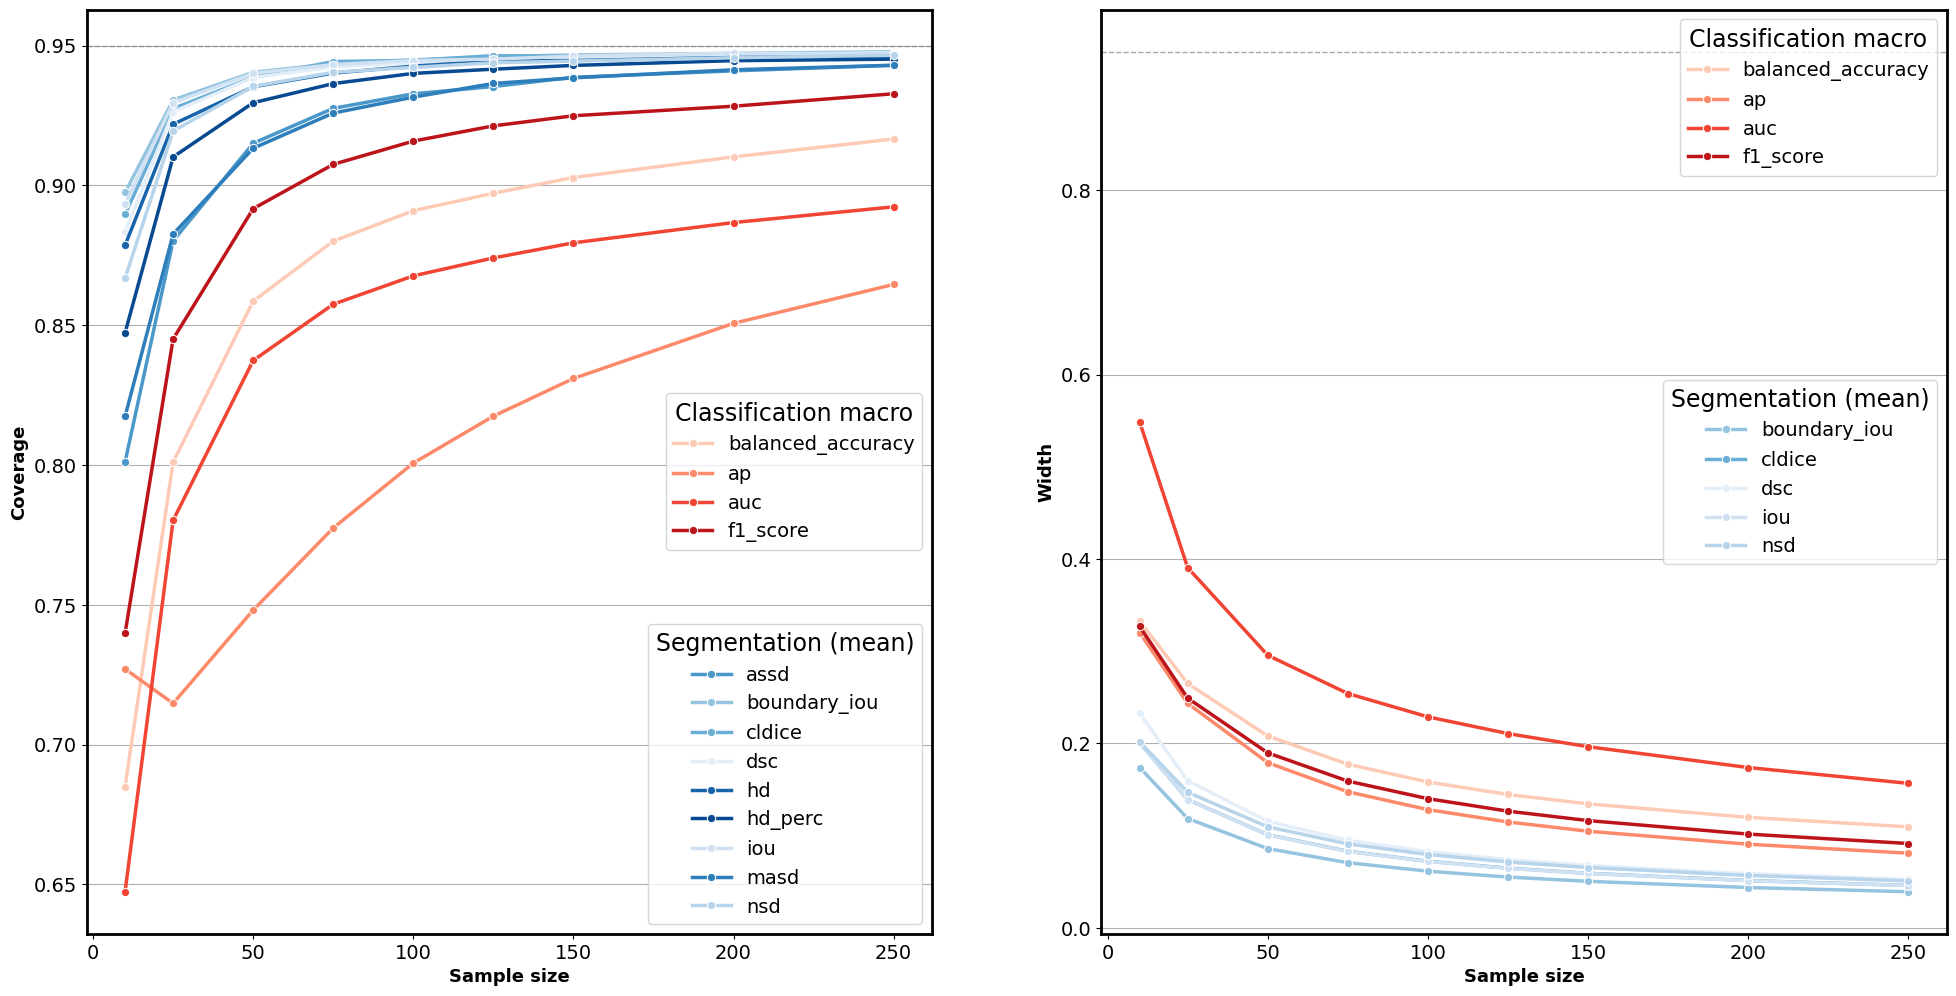

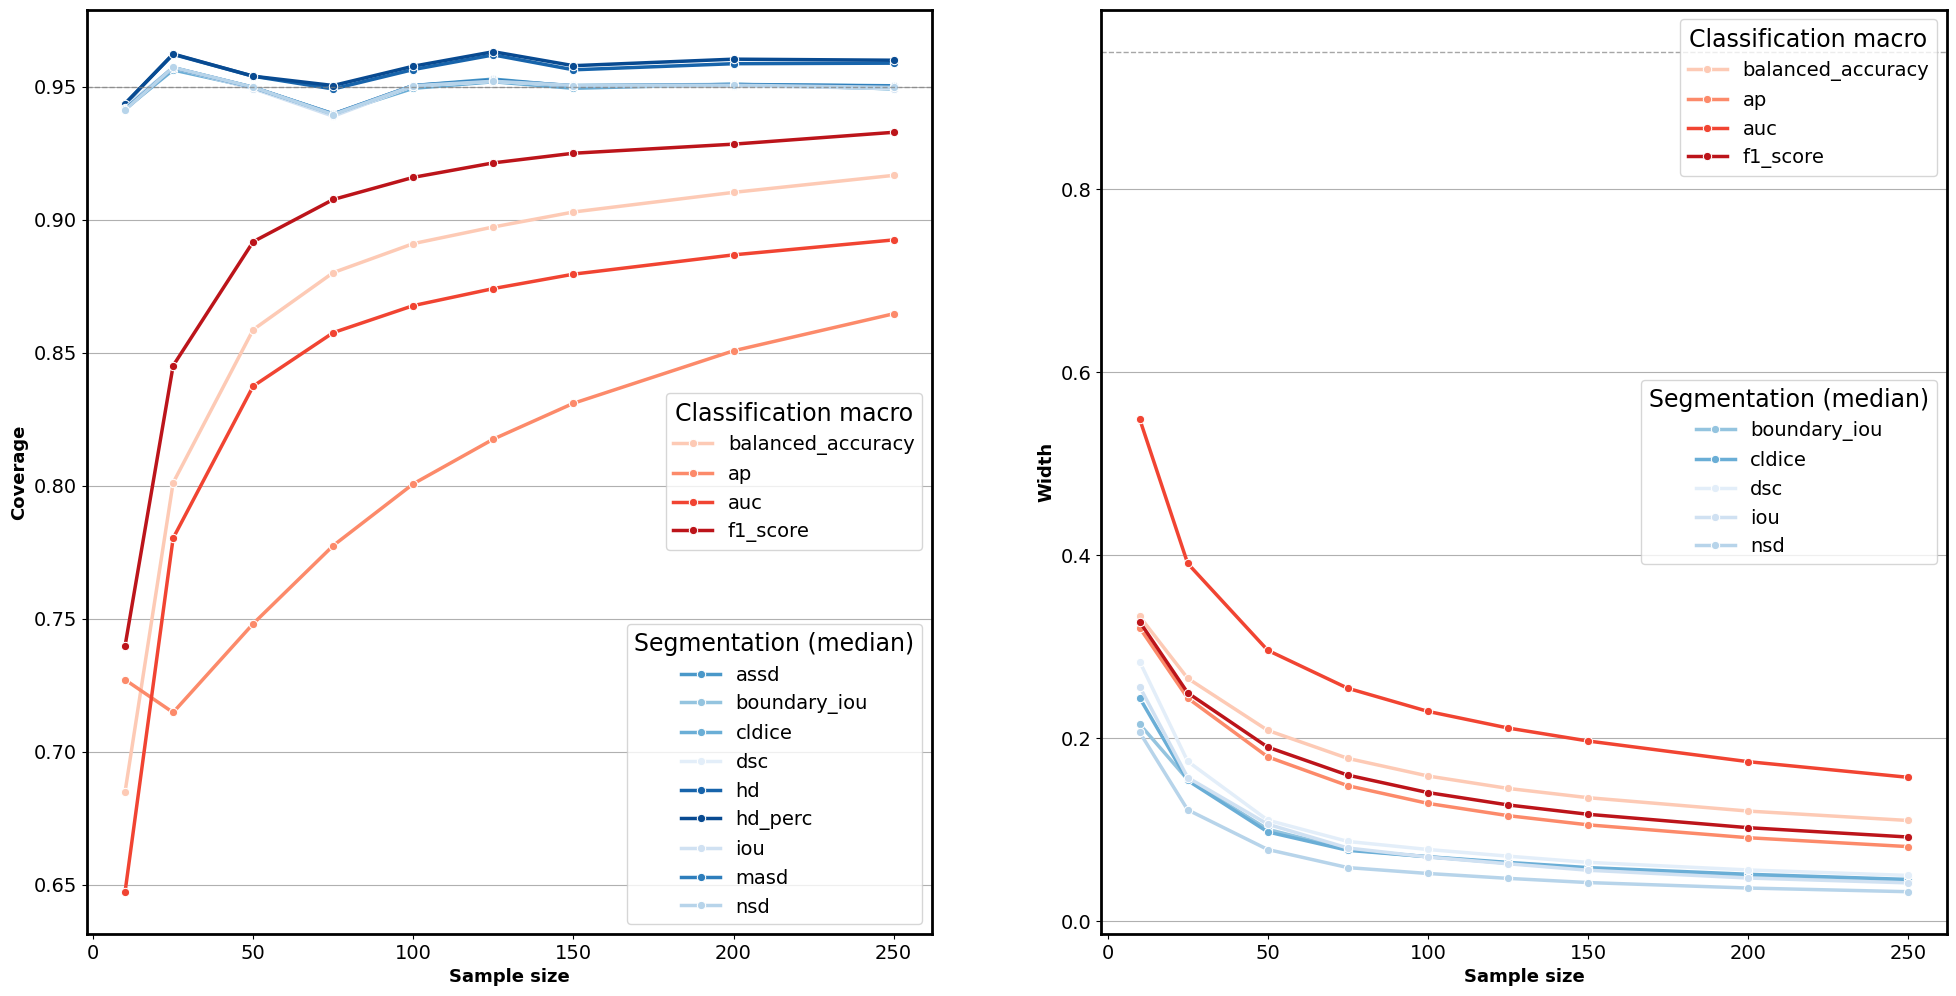

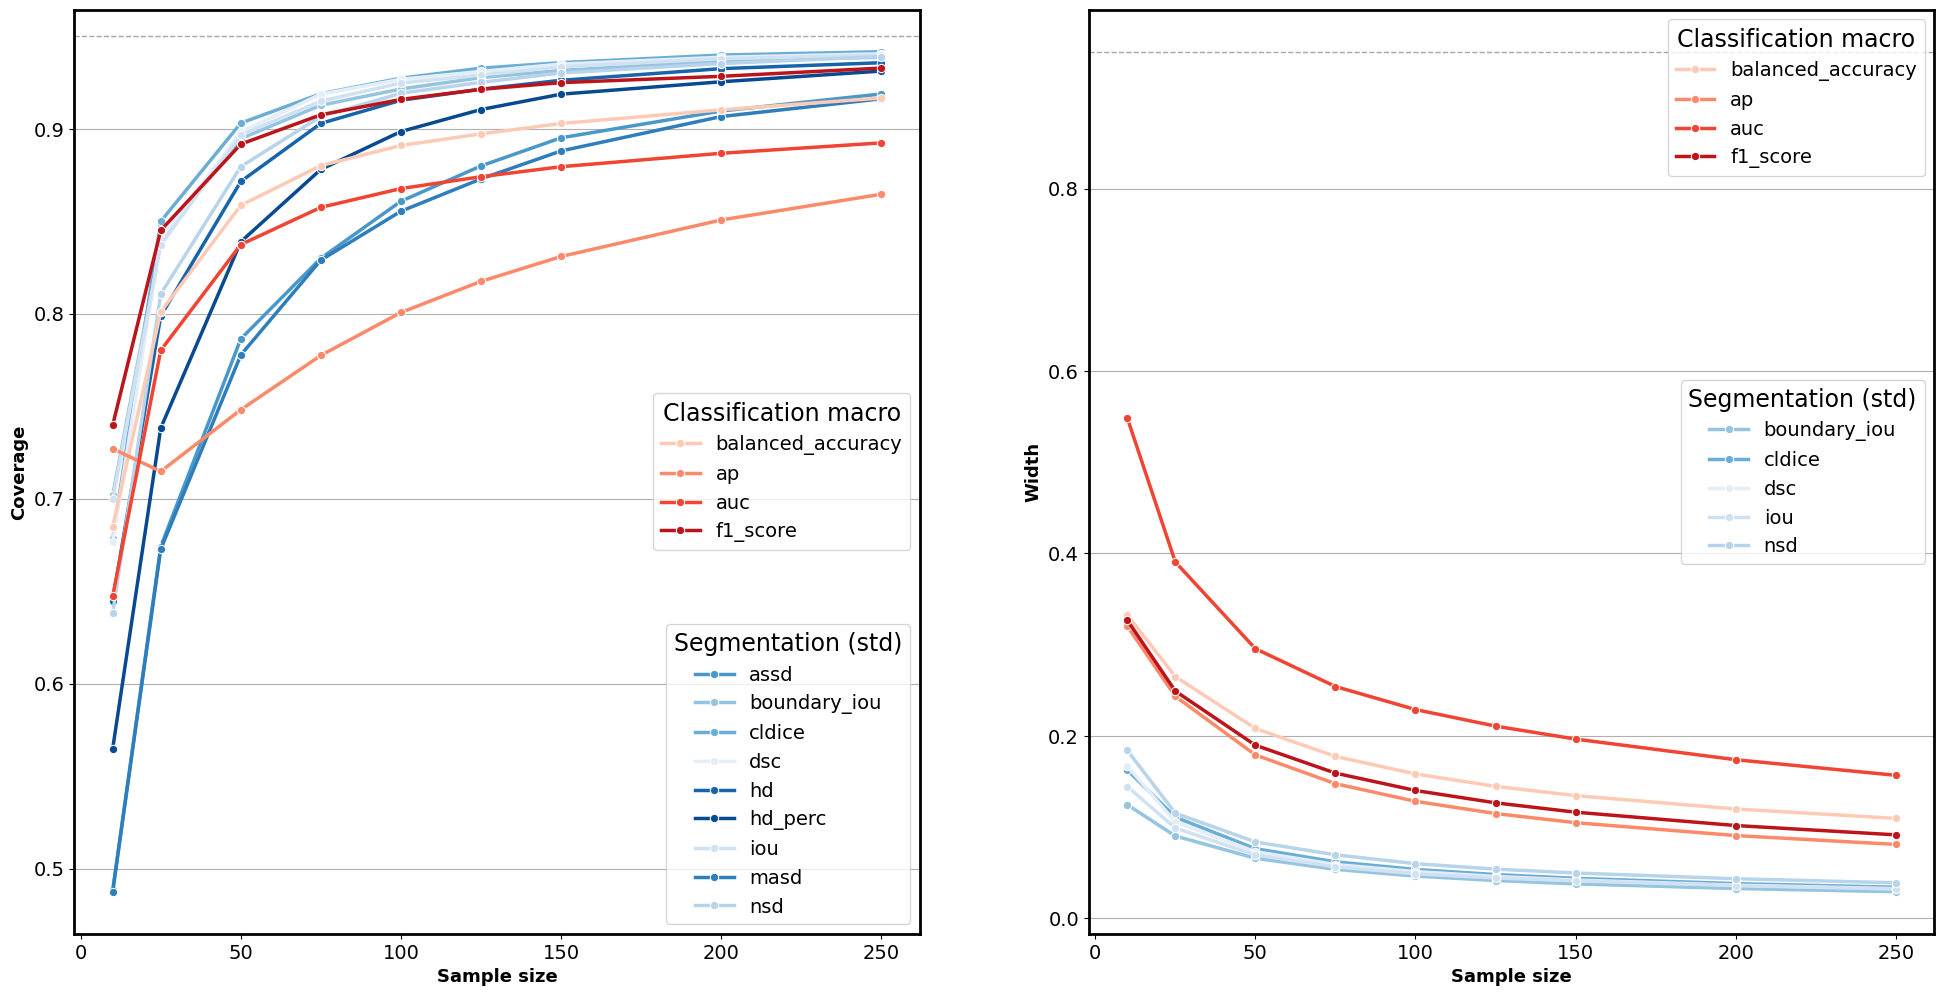

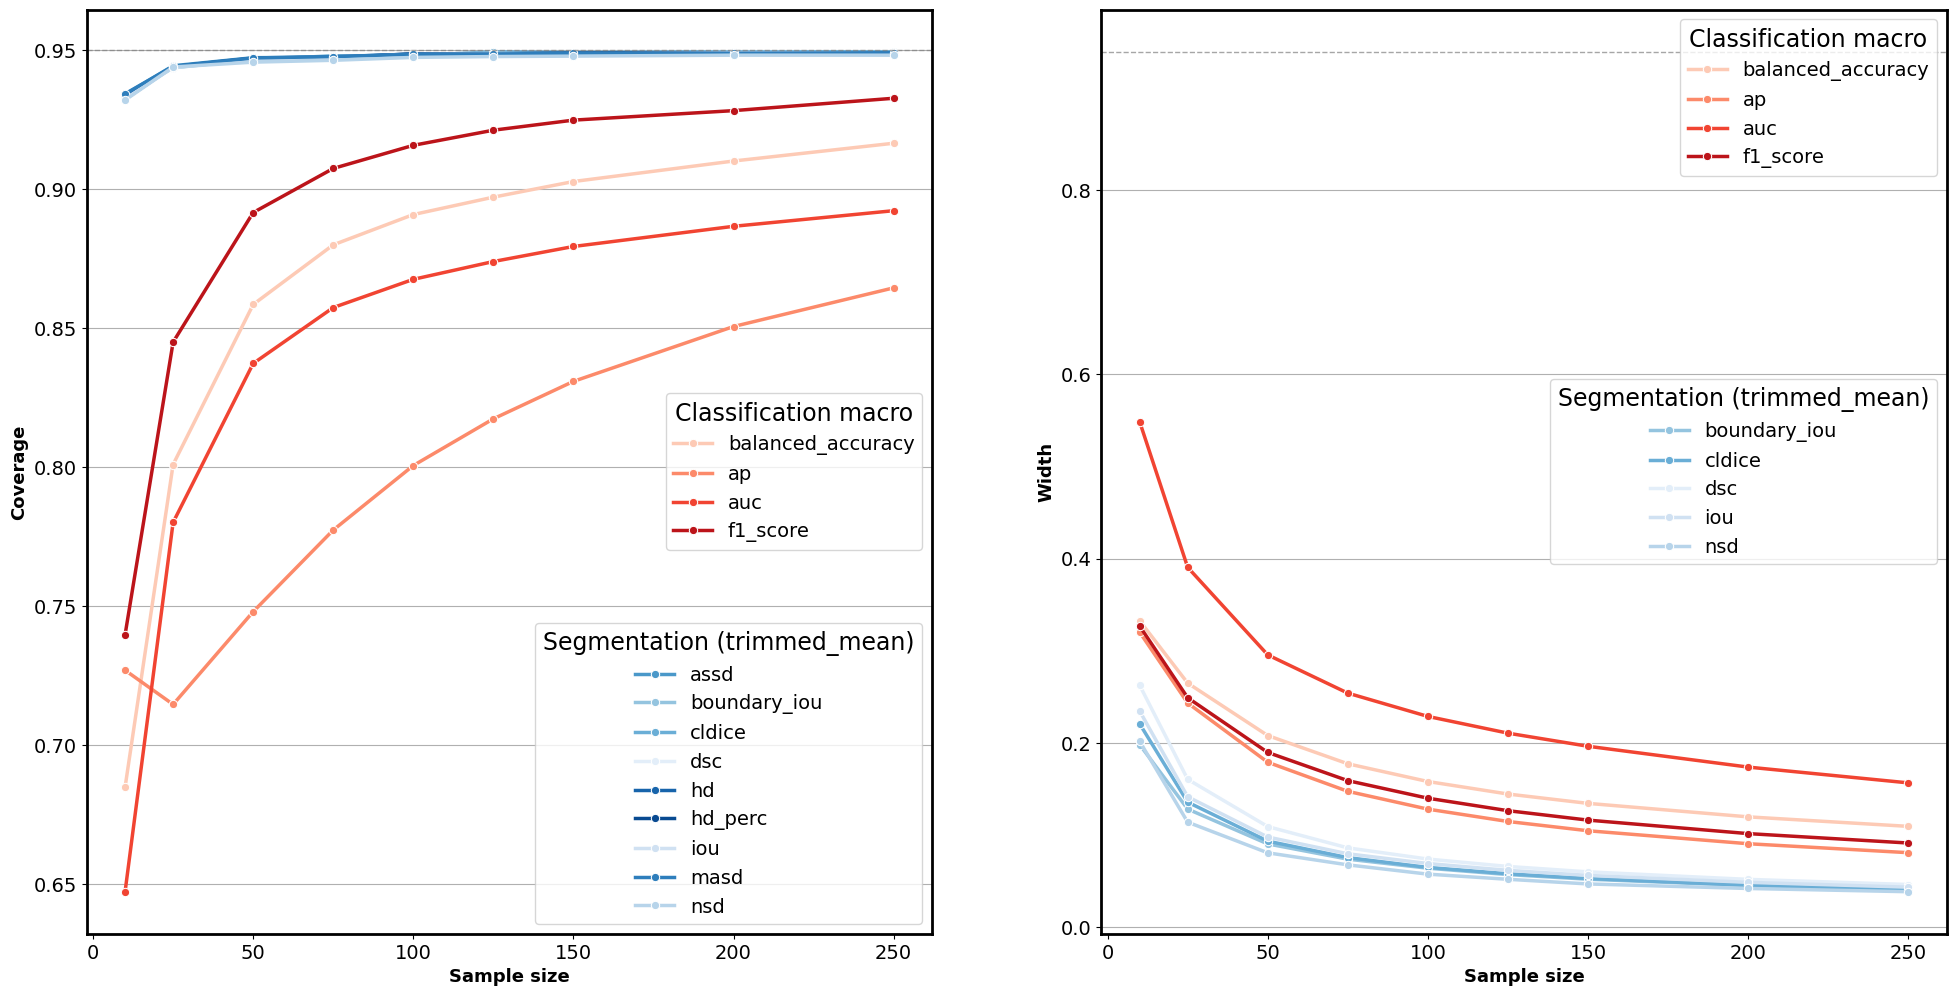

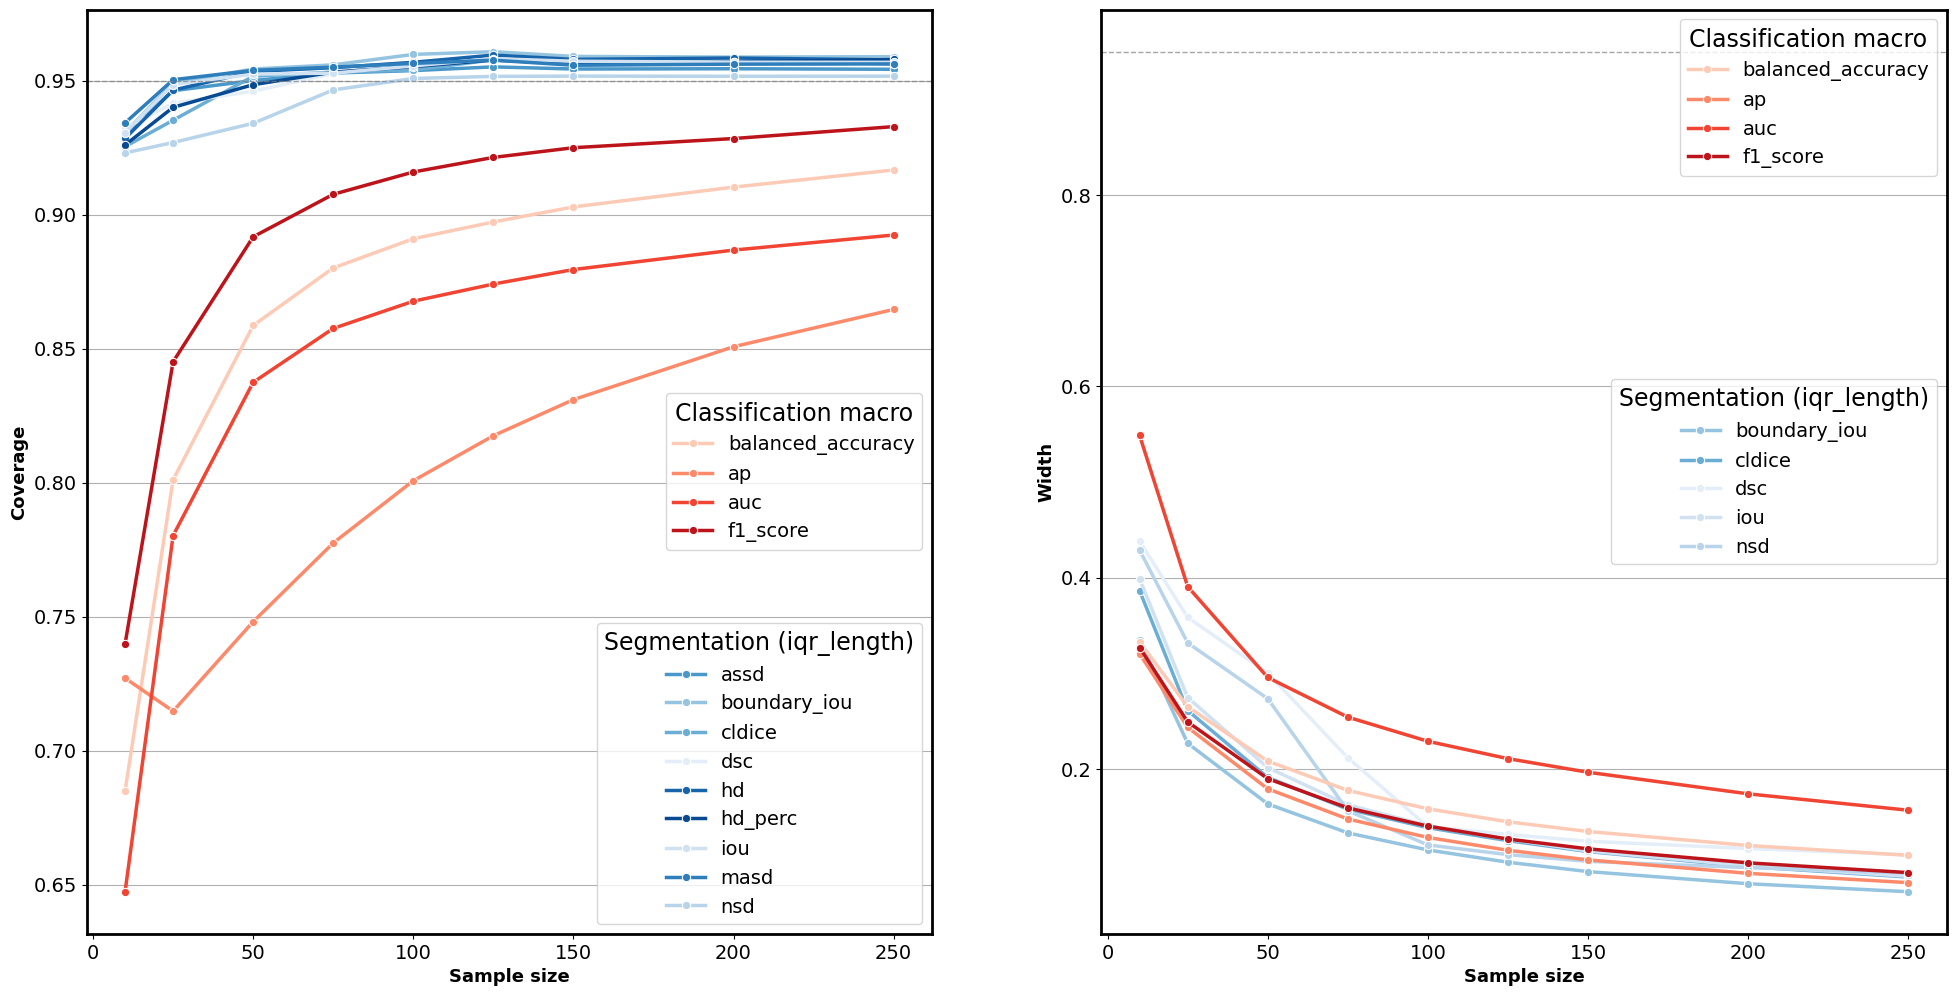

In [ ]:
# Color palettes
palette = sns.color_palette("Blues", len(metric_order))
color_dict = dict(zip(metric_order, palette))
metrics_classif=["balanced_accuracy", "ap", "auc", "f1_score"]
palette_classif = sns.color_palette("Reds", len(metrics_classif))
color_dict_classif = dict(zip(metrics_classif, palette_classif))
df_macro_perc = df_macro[(df_macro['n']<=250) & (df_macro['method']=='percentile')]
df_segm_perc = df_segm[(df_segm['n']<=250) & (df_segm['method']=='percentile')]
df_segm_perc_width = df_segm_width[(df_segm_width['n']<=250) & (df_segm_width['method']=='percentile') & (df_segm_width['metric'].isin(["boundary_iou", "nsd", "iou", "dsc", "cldice"]))]
df_macro_perc_width = df_macro_width[(df_macro_width['n']<=250) & (df_macro_width['method']=='percentile')]
# Segmentation plot
for stat in df_segm_perc['stat'].unique():
    fig, axs = plt.subplots(1, 2, figsize=(24, 12))
    ax = axs[0]
    df_segm_mean=df_segm_perc[df_segm_perc['stat']==stat]

    medians = df_segm_mean.groupby(['n', 'metric'])['coverage'].median().reset_index()
    q1 = df_segm_mean.groupby(['n', 'metric'])['coverage'].quantile(0.25).reset_index()
    q3 = df_segm_mean.groupby(['n', 'metric'])['coverage'].quantile(0.75).reset_index()
    df_plot = medians.merge(q1, on=['n', 'metric'], suffixes=('_median', '_q1')).merge(q3, on=['n', 'metric'])
    df_plot.rename(columns={'coverage': 'coverage_q3'}, inplace=True)

    line1 = sns.lineplot(
        data=df_plot,
        x='n', y='coverage_median', hue='metric',
        marker='o', palette=color_dict, ax=ax, linewidth=2.5,errorbar=None
    )

    # Classification plot

    line2 = sns.lineplot(
        data=df_macro_perc,
        x='n', y='value', hue='stat',
        marker='o', palette=color_dict_classif, ax=ax, linewidth=2.5,errorbar=None
    )

    # Formatting
    ax.axhline(0.95, linestyle='--', color='gray', linewidth=1, alpha=0.7)
    ax.set_xlabel('Sample size', fontsize=13, weight='bold')
    ax.set_ylabel('Coverage', weight='bold', fontsize=13)
    ax.tick_params(axis='x', labelsize=14)
    ax.tick_params(axis='y', labelsize=14)
    ax.grid(True, axis='y')

    # --- Build two legends ---
    # 1) Segmentation
    handles1, labels1 = ax.get_legend_handles_labels()
    n_seg = len(metric_order)  # how many items belong to segmentation
    leg1 = ax.legend(
        handles1[:n_seg], labels1[:n_seg],
        title=f"Segmentation ({stat})", fontsize=14, title_fontsize=17, 
        loc='lower right'
    )

    # 2) Classification
    leg2 = ax.legend(
        handles1[n_seg:], labels1[n_seg:],
        title="Classification macro", fontsize=14, title_fontsize=17,
        loc='center right'
    )

    ax.add_artist(leg1)  # keep both legends

    ### Width plot

    ax = axs[1]
    df_segm_mean=df_segm_perc_width[df_segm_perc_width['stat']==stat]

    medians = df_segm_mean.groupby(['n', 'metric'])['width'].median().reset_index()
    q1 = df_segm_mean.groupby(['n', 'metric'])['width'].quantile(0.25).reset_index()
    q3 = df_segm_mean.groupby(['n', 'metric'])['width'].quantile(0.75).reset_index()
    df_plot = medians.merge(q1, on=['n', 'metric'], suffixes=('_median', '_q1')).merge(q3, on=['n', 'metric'])
    df_plot.rename(columns={'width': 'width_q3'}, inplace=True)

    line1 = sns.lineplot(
        data=df_plot,
        x='n', y='width_median', hue='metric',
        marker='o', palette=color_dict, ax=ax, linewidth=2.5,errorbar=None
    )

    # Classification plot
    line2 = sns.lineplot(
        data=df_macro_perc_width,
        x='n', y='width', hue='stat',
        marker='o', palette=color_dict_classif, ax=ax, linewidth=2.5,errorbar=None
    )

    # Formatting
    ax.set_xlabel('Sample size', fontsize=13, weight='bold')
    ax.set_ylabel('Width', weight='bold', fontsize=13)
    ax.tick_params(axis='x', labelsize=14)
    ax.tick_params(axis='y', labelsize=14)
    ax.grid(True, axis='y')

    # --- Build two legends ---
    # 1) Segmentation
    handles1, labels1 = ax.get_legend_handles_labels()
    n_seg = len(metric_order) - 4  # how many items belong to segmentation
    leg1 = ax.legend(
        handles1[:n_seg], labels1[:n_seg],
        title=f"Segmentation ({stat})", fontsize=14, title_fontsize=17, 
        loc='center right'
    )

    # 2) Classification
    leg2 = ax.legend(
        handles1[n_seg:], labels1[n_seg:],
        title="Classification macro", fontsize=14, title_fontsize=17,
        loc='upper right'
    )

    ax.add_artist(leg1)  # keep both legends


    plt.savefig(f'../../../clean_figs/fig_7_{stat}.pdf')

    plt.show()


# Figure 8

In [ ]:

method_colors = {
    'Basic': '#e26b5b',
    'percentile': '#b39ddb',
    'bca': '#f28c28',
    'Parametric t': '#9e9e9e',
    'Parametric z': '#90caf9'
}
# palette_order = sns.color_palette("Reds",2)
# color_dict_order = dict(zip(['iqr_length','median'], palette_order))
# palette_other = sns.color_palette("Blues",3)
# color_dict_other = dict(zip(['mean', 'std', 'trimmed_mean'], palette_other))
metrics = CI_segm['metric'].unique()
# Identify all columns except 'stat' and 'median'
other_cols = [c for c in CI_segm.columns if c not in ["stat", "median"]]

# --- Order stats ---
data_order = CI_segm[CI_segm['stat'].isin(['median', 'iqr_length'])]
avg_by_stat_order = (
    data_order.groupby(other_cols, as_index=False)["median"].mean()
)
avg_by_stat_order["Stat type"] = "Order"

# --- Other stats ---
data_other = CI_segm[CI_segm['stat'].isin(['mean', 'std', 'trimmed_mean'])]
avg_by_stat_other = (
    data_other.groupby(other_cols, as_index=False)["median"].mean()
)
avg_by_stat_other["Stat type"] = "Other"

# --- Combine ---
df_all = pd.concat([avg_by_stat_other, avg_by_stat_order], ignore_index=True)

print(df_all)


for metric in metrics:
    df_all_metric=df_all[df_all['metric']==metric]
    data_method=df_all_metric[df_all_metric['method'].isin(['bca', 'percentile'])]
    fig, ax = plt.subplots(1, 1, figsize=(10, 10), sharey=True)


# Other plot
    sns.lineplot(
        data=data_method,
        x='n', y='median', hue='method',
        marker='o', palette=method_colors, ax=ax, linewidth=2.5,  style='Stat type', errorbar=None
    )

    ax.axhline(0.95, linestyle='--', color='gray', linewidth=1, alpha=0.7)
    ax.set_title(f'Metric: {metric}', weight='bold')
    ax.set_xlabel('Sample size',weight='bold', fontsize=16)
    ax.set_ylabel('Coverage', weight='bold', fontsize=16)
    ax.tick_params(axis='y', labelsize=14)
    ax.tick_params(axis='x', labelsize=14)

    ax.grid(True, axis='y')

    ax.legend(prop={'weight':'bold'}, fontsize= 20)
    plt.legend(fontsize= 20)

    plt.savefig(f"../../../clean_figs/message3_fail_bca_{metric}_cov.pdf") # leave room for suptitle
    plt.show()
